In [1]:
# suppress display of warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
from sklearn.metrics import log_loss


In [2]:
plt.rcParams['figure.figsize'] = [15,8]

In [3]:
sf_crime = pd.read_csv('../input/sfcrime/cleaned_SF_crime_report (1).csv')
sf_crime

Incident_Date Incident_Time Incident_Day_of_Week  \
0         2019/03/05         21:00              Tuesday   
1         2018/12/22         12:00             Saturday   
2         2018/08/24         17:30               Friday   
3         2018/10/20         15:10             Saturday   
4         2019/06/05         00:36            Wednesday   
...              ...           ...                  ...   
554707    2021/01/15         20:00               Friday   
554708    2020/08/01         17:34             Saturday   
554709    2020/06/01         01:55               Monday   
554710    2020/10/24         17:00             Saturday   
554711    2020/11/19         08:30             Thursday   

               Report_Datetime       Row_ID  Incident_ID  Incident_Number  \
0       2019/03/07 12:54:00 PM  77808706372       778087        196048512   
1       2018/12/26 02:29:00 PM  75246907023       752469        180971777   
2       2018/08/24 07:35:00 PM  70675306243       706753        180639339   
3       2018/10/20 03:10:00 PM  72826462071       728264        180624631   
4       2019/06/05 12:37:00 AM  80823030140       808230        190403077   
...                        ...          ...          ...              ...   
554707  2021/01/18 11:03:00 PM  99729103074       997291        210041000   
554708  2020/08/01 06:04:00 PM  94911806361       949118        200461010   
554709  2020/06/01 01:55:00 AM  93192005061       931920        200330863   
554710  2020/10/24 06:34:00 PM  97231606244       972316        200642975   
554711  2020/11/20 12:46:00 AM  97988375000       979883        200700573   

       Report_Type_Code Report_Type_Description  Filed_Online  ...  \
0                    II        Coplogic Initial          True  ...   
1                    VI         Vehicle Initial         False  ...   
2                    II                 Initial         False  ...   
3                    IS      Initial Supplement         False  ...   
4                    II                 Initial         False  ...   
...                 ...                     ...           ...  ...   
554707               II                 Initial         False  ...   
554708               II                 Initial         False  ...   
554709               II                 Initial         False  ...   
554710               II                 Initial         False  ...   
554711               II                 Initial         False  ...   

          Incident_Category         Incident_Subcategory  \
0             Larceny Theft        Larceny Theft - Other   
1       Motor Vehicle Theft          Motor Vehicle Theft   
2             Larceny Theft       Larceny - From Vehicle   
3                   Warrant                        Other   
4            Other Offenses                        Other   
...                     ...                          ...   
554707              Robbery              Robbery - Other   
554708        Larceny Theft  Larceny Theft - Shoplifting   
554709             Burglary        Burglary - Commercial   
554710        Larceny Theft       Larceny - From Vehicle   
554711       Missing Person               Missing Person   

                         Incident_Description            Resolution  \
0             Theft, Other Property, $50-$200        Open or Active   
1                 Vehicle, Stolen, Motorcycle        Open or Active   
2       Theft, From Locked Vehicle, $200-$950        Open or Active   
3                            Probation Search  Cite or Arrest Adult   
4                         Air Gun, Possession  Cite or Arrest Adult   
...                                       ...                   ...   
554707                      Robbery, W/ Force  Cite or Arrest Adult   
554708               Theft, Shoplifting, <$50        Open or Active   
554709    Burglary, Warehouse, Forcible Entry        Open or Active   
554710      Theft, From Locked Vehicle, >$950        Open or Active   
554711                        

In [4]:
sf_crime.head()

Incident_Date Incident_Time Incident_Day_of_Week         Report_Datetime  \
0    2019/03/05         21:00              Tuesday  2019/03/07 12:54:00 PM   
1    2018/12/22         12:00             Saturday  2018/12/26 02:29:00 PM   
2    2018/08/24         17:30               Friday  2018/08/24 07:35:00 PM   
3    2018/10/20         15:10             Saturday  2018/10/20 03:10:00 PM   
4    2019/06/05         00:36            Wednesday  2019/06/05 12:37:00 AM   

        Row_ID  Incident_ID  Incident_Number Report_Type_Code  \
0  77808706372       778087        196048512               II   
1  75246907023       752469        180971777               VI   
2  70675306243       706753        180639339               II   
3  72826462071       728264        180624631               IS   
4  80823030140       808230        190403077               II   

  Report_Type_Description  Filed_Online  ...    Incident_Category  \
0        Coplogic Initial          True  ...        Larceny Theft   
1         Vehicle Initial         False  ...  Motor Vehicle Theft   
2                 Initial         False  ...        Larceny Theft   
3      Initial Supplement         False  ...              Warrant   
4                 Initial         False  ...       Other Offenses   

     Incident_Subcategory                   Incident_Description  \
0   Larceny Theft - Other        Theft, Other Property, $50-$200   
1     Motor Vehicle Theft            Vehicle, Stolen, Motorcycle   
2  Larceny - From Vehicle  Theft, From Locked Vehicle, $200-$950   
3                   Other                       Probation Search   
4                   Other                    Air Gun, Possession   

             Resolution         CNN  Police_District Analysis_Neighborhood  \
0        Open or Active  30044000.0       Tenderloin            Tenderloin   
1        Open or Active  25931000.0         Northern          Hayes Valley   
2        Open or Active  21610000.0        Ingleside             Excelsior   
3  Cite or Arrest Adult  23914000.0         Southern       South of Market   
4  Cite or Arrest Adult  30035000.0          Central           North Beach   

  Supervisor_District   Latitude   Longitude  
0                 6.0  37.779992 -122.413487  
1                 5.0  37.775787 -122.427819  
2                 9.0  37.723944 -122.422830  
3                 6.0  37.775161 -122.403636  
4                 3.0  37.802755 -122.413623  

[5 rows x 21 columns]

In [5]:
sf_crime.shape

(554712, 21)

In [6]:
sf_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554712 entries, 0 to 554711
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Incident_Date            554712 non-null  object 
 1   Incident_Time            554712 non-null  object 
 2   Incident_Day_of_Week     554712 non-null  object 
 3   Report_Datetime          554712 non-null  object 
 4   Row_ID                   554712 non-null  int64  
 5   Incident_ID              554712 non-null  int64  
 6   Incident_Number          554712 non-null  int64  
 7   Report_Type_Code         554712 non-null  object 
 8   Report_Type_Description  554712 non-null  object 
 9   Filed_Online             554712 non-null  bool   
 10  Incident_Code            554712 non-null  int64  
 11  Incident_Category        554712 non-null  object 
 12  Incident_Subcategory     554712 non-null  object 
 13  Incident_Description     554712 non-null  object 
 14  Reso

In [7]:
len(sf_crime['Analysis_Neighborhood'].unique())

41

In [8]:
sf_crime['Analysis_Neighborhood'].unique()
# all values are neighborhood names

array(['Tenderloin', 'Hayes Valley', 'Excelsior', 'South of Market',
       'North Beach', 'Financial District/South Beach',
       'Bayview Hunters Point', 'Japantown', 'Pacific Heights',
       'Noe Valley', 'Nob Hill', 'Visitacion Valley', 'Lone Mountain/USF',
       'Mission', 'Marina', 'Inner Sunset', 'Outer Mission',
       'Haight Ashbury', 'Portola', 'Outer Richmond',
       'West of Twin Peaks', 'Chinatown', 'Presidio',
       'Castro/Upper Market', 'Russian Hill', 'Sunset/Parkside',
       'Seacliff', 'Oceanview/Merced/Ingleside', 'Western Addition',
       'Potrero Hill', 'Mission Bay', 'Golden Gate Park',
       'Bernal Heights', 'Lakeshore', 'Twin Peaks', 'Presidio Heights',
       'Inner Richmond', 'Lincoln Park', 'Glen Park', 'McLaren Park',
       'Treasure Island'], dtype=object)

In [9]:
sf_crime['Incident_Description'].unique()

array(['Theft, Other Property, $50-$200', 'Vehicle, Stolen, Motorcycle',
       'Theft, From Locked Vehicle, $200-$950', 'Probation Search',
       'Air Gun, Possession', 'Theft, From Building, >$950',
       'State Code Felony (general)', 'Burglary, Store, Unlawful Entry',
       'Violation of Restraining Order',
       'Robbery, Service Station, W/ Force', 'Lost Property',
       'False Personation to Receive Money or Property',
       'Malicious Mischief, Vandalism to Vehicle', 'Battery',
       'Vehicle, Recovered, Stolen outside SF', 'Case Closure',
       'Theft, From Locked Vehicle, >$950',
       'Theft, From Person, >$950 (other than Pickpocket)',
       'Theft, From Building, <$50', 'Robbery, Chain Store, W/ Force',
       'Investigative Detention', 'Trespassing', 'Probation Violation',
       'Driving, No License Issued', 'Assault, Aggravated, W/ Gun',
       'Mental Health Detention', 'Driving, License Suspended or Revoked',
       'Theft, From Unlocked Vehicle, >$950',
   

In [10]:
sf_crime.describe()

Row_ID   Incident_ID  Incident_Number  Incident_Code  \
count  5.547120e+05  5.547120e+05     5.547120e+05  554712.000000   
mean   8.828255e+10  8.828253e+05     1.971911e+08   25181.968270   
std    1.510503e+10  1.510503e+05     1.315458e+07   25796.076947   
min    6.186910e+10  6.186910e+05     0.000000e+00    1000.000000   
25%    7.520730e+10  7.520728e+05     1.862495e+08    6244.000000   
50%    8.833879e+10  8.833875e+05     1.962223e+08    7054.000000   
75%    1.012677e+11  1.012677e+06     2.101678e+08   61030.000000   
max    1.145722e+11  1.145722e+06     9.811720e+08   75030.000000   

                CNN  Supervisor_District       Latitude      Longitude  
count  5.547120e+05        554712.000000  554712.000000  554712.000000  
mean   2.532589e+07             5.965669      37.769249    -122.423997  
std    3.095378e+06             2.810175       0.024381       0.026351  
min    2.001300e+07             1.000000      37.707988    -122.511295  
25%    2.396700e+07             3.000000      37.755214    -122.434602  
50%    2.492500e+07             6.000000      37.775764    -122.417806  
75%    2.647000e+07             8.000000      37.785893    -122.407323  
max    5.420300e+07            11.000000      37.829991    -122.363743

In [11]:
sf_crime.describe().T

count          mean           std           min  \
Row_ID               554712.0  8.828255e+10  1.510503e+10  6.186910e+10   
Incident_ID          554712.0  8.828253e+05  1.510503e+05  6.186910e+05   
Incident_Number      554712.0  1.971911e+08  1.315458e+07  0.000000e+00   
Incident_Code        554712.0  2.518197e+04  2.579608e+04  1.000000e+03   
CNN                  554712.0  2.532589e+07  3.095378e+06  2.001300e+07   
Supervisor_District  554712.0  5.965669e+00  2.810175e+00  1.000000e+00   
Latitude             554712.0  3.776925e+01  2.438112e-02  3.770799e+01   
Longitude            554712.0 -1.224240e+02  2.635115e-02 -1.225113e+02   

                              25%           50%           75%           max  
Row_ID               7.520730e+10  8.833879e+10  1.012677e+11  1.145722e+11  
Incident_ID          7.520728e+05  8.833875e+05  1.012677e+06  1.145722e+06  
Incident_Number      1.862495e+08  1.962223e+08  2.101678e+08  9.811720e+08  
Incident_Code        6.244000e+03  7.054000e+03  6.103000e+04  7.503000e+04  
CNN                  2.396700e+07  2.492500e+07  2.647000e+07  5.420300e+07  
Supervisor_District  3.000000e+00  6.000000e+00  8.000000e+00  1.100000e+01  
Latitude             3.775521e+01  3.777576e+01  3.778589e+01  3.782999e+01  
Longitude           -1.224346e+02 -1.224178e+02 -1.224073e+02 -1.223637e+02

<AxesSubplot:>

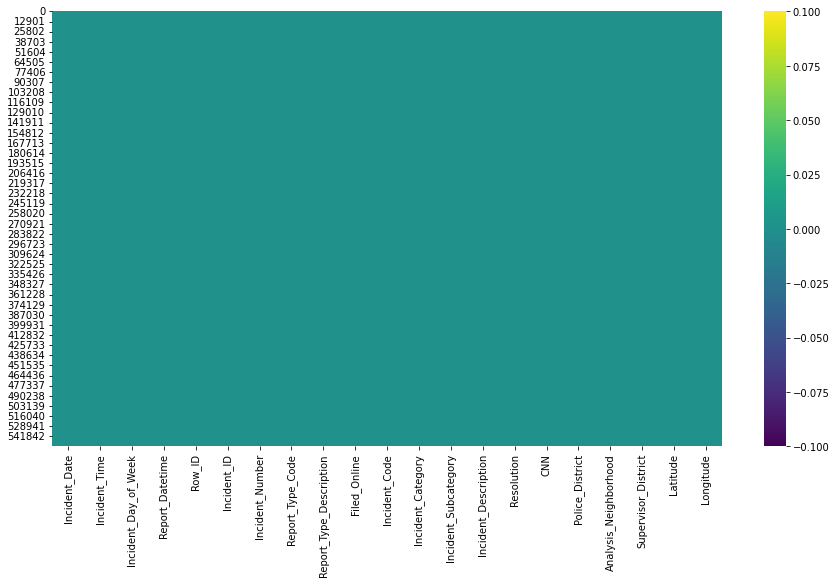

In [12]:
#checking for missing values via heatmap
sns.heatmap(sf_crime.isnull(), cmap = 'viridis')

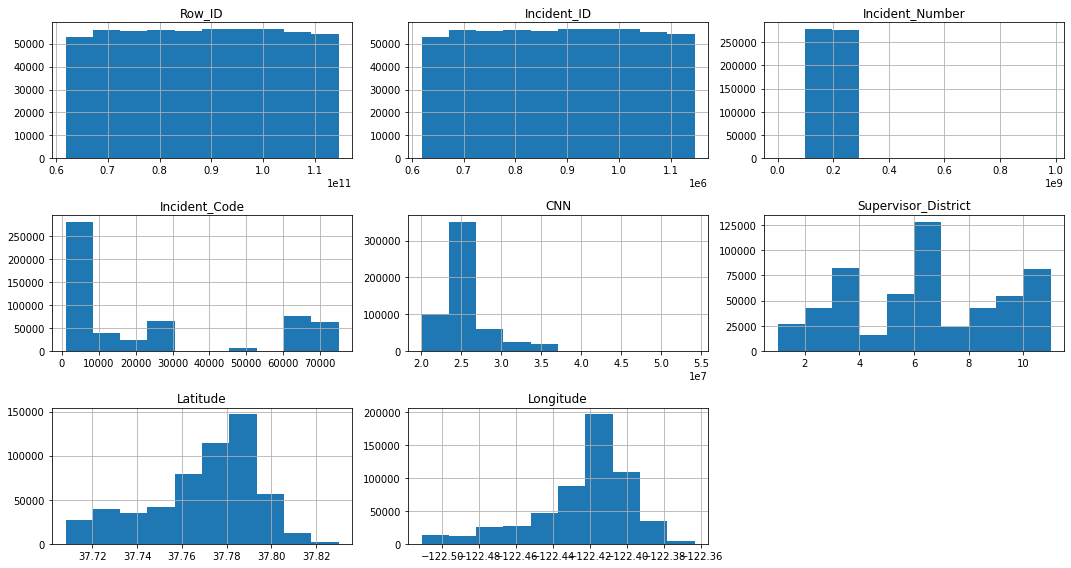

In [13]:
# plot the histogram of numeric independent variables
# the hist() function considers the numeric variables only, by default
sf_crime.hist()

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()  

In [14]:
# use the corr() function to generate the correlation matrix of the numeric variables
corrmat = sf_crime.corr()

# print the correlation matrix
corrmat

Row_ID  Incident_ID  Incident_Number  Filed_Online  \
Row_ID               1.000000     1.000000         0.928391     -0.032634   
Incident_ID          1.000000     1.000000         0.928391     -0.032633   
Incident_Number      0.928391     0.928391         1.000000      0.117950   
Filed_Online        -0.032634    -0.032633         0.117950      1.000000   
Incident_Code       -0.025319    -0.025320        -0.060484     -0.202151   
CNN                 -0.002790    -0.002790         0.006024      0.055657   
Supervisor_District  0.003531     0.003531        -0.012673     -0.116576   
Latitude            -0.019199    -0.019199        -0.003507      0.110611   
Longitude           -0.021737    -0.021737        -0.028963     -0.052246   

                     Incident_Code       CNN  Supervisor_District  Latitude  \
Row_ID                   -0.025319 -0.002790             0.003531 -0.019199   
Incident_ID              -0.025320 -0.002790             0.003531 -0.019199   
Incident_Number          -0.060484  0.006024            -0.012673 -0.003507   
Filed_Online             -0.202151  0.055657            -0.116576  0.110611   
Incident_Code             1.000000 -0.032793             0.059376 -0.049021   
CNN                      -0.032793  1.000000            -0.412918  0.374118   
Supervisor_District       0.059376 -0.412918             1.000000 -0.764195   
Latitude                 -0.049021  0.374118            -0.764195  1.000000   
Longitude                 0.015478 -0.201558             0.318425  0.154794   

                     Longitude  
Row_ID               -0.021737  
Incident_ID          -0.021737  
Incident_Number      -0.028963  
Filed_Online         -0.052246  
Incident_Code         0.015478  
CNN                  -0.201558  
Supervisor_District   0.318425  
Latitude              0.154794  
Longitude             1.000000

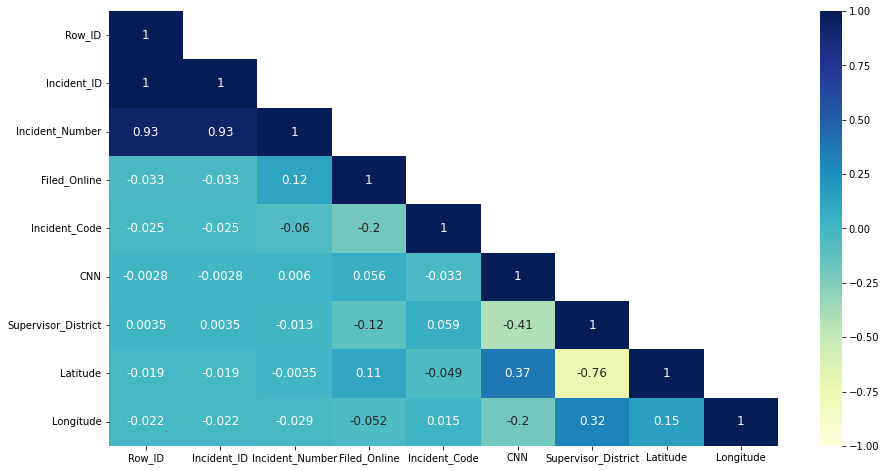

In [15]:

mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask, k=1)] = True

sns.heatmap(corrmat, cmap = 'YlGnBu', vmax = 1.0, vmin = -1.0, annot = True, annot_kws = {"size": 12}, mask = mask)

# display the plot
plt.show()

In [16]:
sf_crime[['Incident_Category', 'Incident_Day_of_Week']].value_counts().head(10)

Incident_Category    Incident_Day_of_Week
Larceny Theft        Friday                  25455
                     Saturday                24360
                     Wednesday               22915
                     Monday                  22659
                     Thursday                22349
                     Sunday                  22246
                     Tuesday                 21547
Other Miscellaneous  Wednesday                6558
                     Friday                   6126
                     Thursday                 6000
dtype: int64

Text(0.5, 1.0, 'Crime counts')

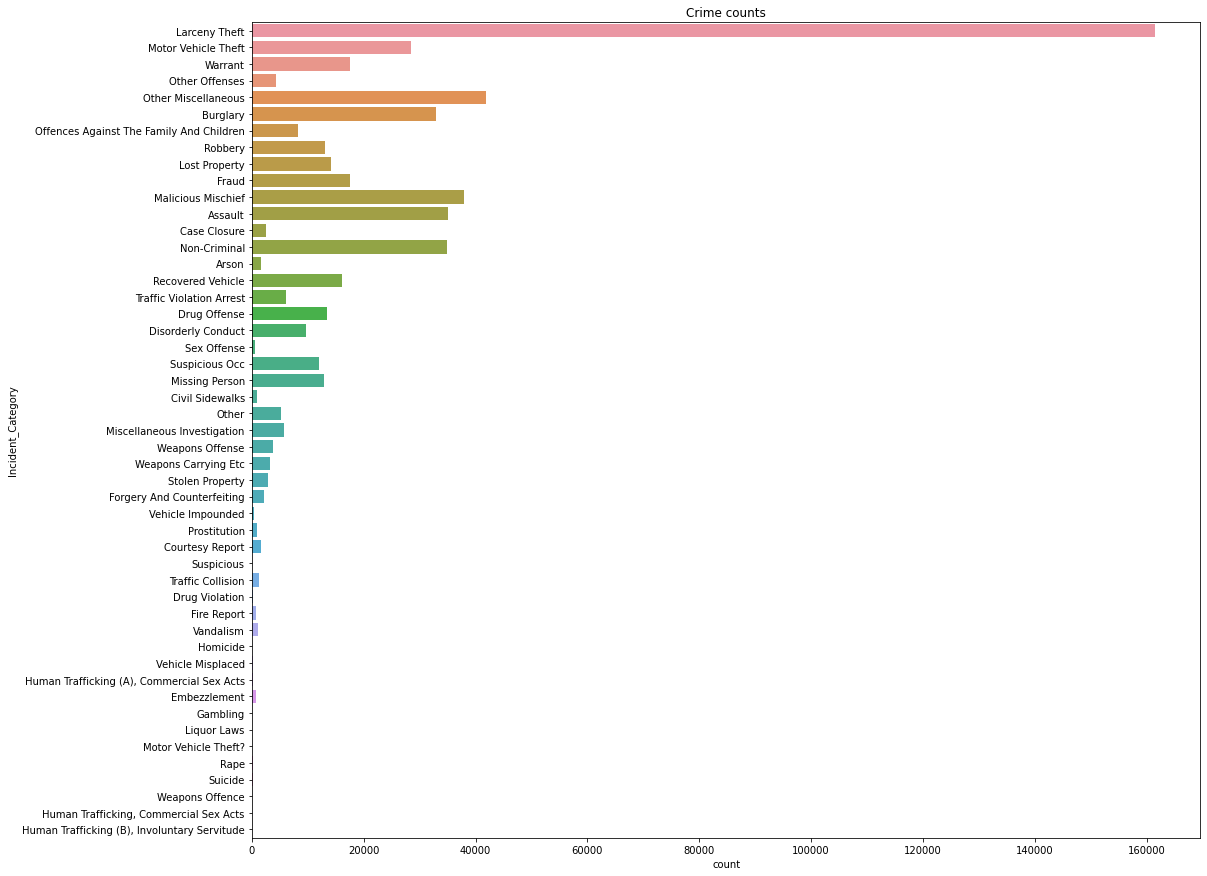

In [17]:
fig, count = plt.subplots(figsize = (17,15))
count = sns.countplot(y = sf_crime['Incident_Category'])
count.set_title('Crime counts')

In [18]:
category_freqency = pd.DataFrame(sf_crime['Incident_Category'].value_counts(normalize=True))
category_freqency.reset_index(inplace=True)
category_freqency.rename({'index': 'Incident_Category', 'Incident_Category': 'Frequency'}, axis='columns', inplace=True)
category_freqency['Cumulative_Freq'] = category_freqency['Frequency'].cumsum()
category_freqency

Incident_Category  Frequency  Cumulative_Freq
0                                  Larceny Theft   0.291198         0.291198
1                            Other Miscellaneous   0.075445         0.366643
2                             Malicious Mischief   0.068320         0.434963
3                                        Assault   0.063325         0.498287
4                                   Non-Criminal   0.062903         0.561190
5                                       Burglary   0.059478         0.620668
6                            Motor Vehicle Theft   0.051338         0.672006
7                                        Warrant   0.031732         0.703738
8                                          Fraud   0.031561         0.735299
9                              Recovered Vehicle   0.029107         0.764406
10                                 Lost Property   0.025395         0.789801
11                                  Drug Offense   0.024231         0.814031
12                                       Robbery   0.023715         0.837746
13                                Missing Person   0.023120         0.860867
14                                Suspicious Occ   0.021521         0.882388
15                            Disorderly Conduct   0.017496         0.899883
16      Offences Against The Family And Children   0.014779         0.914662
17                      Traffic Violation Arrest   0.011042         0.925704
18                   Miscellaneous Investigation   0.010405         0.936109
19                                         Other   0.009374         0.945483
20                                Other Offenses   0.007739         0.953223
21                               Weapons Offense   0.006960         0.960183
22                          Weapons Carrying Etc   0.005722         0.965905
23                               Stolen Property   0.005340         0.971245
24                                  Case Closure   0.004422         0.975667
25                    Forgery And Counterfeiting   0.003807         0.979474
26                                         Arson   0.003005         0.982479
27                               Courtesy Report   0.002910         0.985389
28                             Traffic Collision   0.002356         0.987745
29                                     Vandalism   0.002122         0.989867
30                                  Prostitution   0.001601         0.991468
31                               Civil Sidewalks   0.001592         0.993059
32                                   Fire Report   0.001464         0.994523
33                                  Embezzlement   0.001390         0.995913
34                                   Sex Offense   0.001127         0.997040
35                             Vehicle Impounded   0.000672         0.997712
36                                       Suicide   0.000447         0.998159
37                             Vehicle Misplaced   0.000427         0.998587
38                                Drug Violation   0.000335         0.998922
39                                          Rape   0.000258         0.999180
40    Human Trafficking (A), Commercial Sex Acts   0.000218         0.999398
41                                    Suspicious   0.000164         0.999562
42                          Motor Vehicle Theft?   0.000121         0.999683
43                                      Homicide   0.000117         0.999800
44                                   Liquor Laws   0.000079         0.999879
45                                      Gambling   0.000047         0.999926
46                               Weapons Offence   0.000036         0.999962
47        Human Trafficking, Commercial Sex Acts   0.000036         0.999998
48  Human Trafficking (B), Involuntary Servitude   0.000002         1.000000

In [19]:
Top_class1 = list(category_freqency.loc[category_freqency['Frequency'] > 0.02, 'Incident_Category'])
Top_class1

['Larceny Theft',
 'Other Miscellaneous',
 'Malicious Mischief',
 'Assault',
 'Non-Criminal',
 'Burglary',
 'Motor Vehicle Theft',
 'Warrant',
 'Fraud',
 'Recovered Vehicle',
 'Lost Property',
 'Drug Offense',
 'Robbery',
 'Missing Person',
 'Suspicious Occ']

In [20]:
Top_class = list(category_freqency.loc[category_freqency['Cumulative_Freq'] < 0.8, 'Incident_Category'])
Top_class

['Larceny Theft',
 'Other Miscellaneous',
 'Malicious Mischief',
 'Assault',
 'Non-Criminal',
 'Burglary',
 'Motor Vehicle Theft',
 'Warrant',
 'Fraud',
 'Recovered Vehicle',
 'Lost Property']

In [21]:
import datetime
sf_crime['year'] = pd. DatetimeIndex(sf_crime['Incident_Date']).year


In [22]:
reduced_cat = sf_crime.loc[sf_crime['Incident_Category'].isin(Top_class)]
reduced_cat

Incident_Date Incident_Time Incident_Day_of_Week  \
0         2019/03/05         21:00              Tuesday   
1         2018/12/22         12:00             Saturday   
2         2018/08/24         17:30               Friday   
3         2018/10/20         15:10             Saturday   
5         2019/02/12         07:00              Tuesday   
...              ...           ...                  ...   
554704    2020/09/12         19:35             Saturday   
554706    2020/07/16         16:00             Thursday   
554708    2020/08/01         17:34             Saturday   
554709    2020/06/01         01:55               Monday   
554710    2020/10/24         17:00             Saturday   

               Report_Datetime       Row_ID  Incident_ID  Incident_Number  \
0       2019/03/07 12:54:00 PM  77808706372       778087        196048512   
1       2018/12/26 02:29:00 PM  75246907023       752469        180971777   
2       2018/08/24 07:35:00 PM  70675306243       706753        180639339   
3       2018/10/20 03:10:00 PM  72826462071       728264        180624631   
5       2019/02/12 09:20:00 AM  76962406304       769624        190106328   
...                        ...          ...          ...              ...   
554704  2020/09/12 07:35:00 PM  96084327068       960843        200549945   
554706  2020/07/17 01:26:00 PM  94458906301       944589        200427733   
554708  2020/08/01 06:04:00 PM  94911806361       949118        200461010   
554709  2020/06/01 01:55:00 AM  93192005061       931920        200330863   
554710  2020/10/24 06:34:00 PM  97231606244       972316        200642975   

       Report_Type_Code Report_Type_Description  Filed_Online  ...  \
0                    II        Coplogic Initial          True  ...   
1                    VI         Vehicle Initial         False  ...   
2                    II                 Initial         False  ...   
3                    IS      Initial Supplement         False  ...   
5                    II                 Initial         False  ...   
...                 ...                     ...           ...  ...   
554704               II                 Initial         False  ...   
554706               II                 Initial         False  ...   
554708               II                 Initial         False  ...   
554709               II                 Initial         False  ...   
554710               II                 Initial         False  ...   

                 Incident_Subcategory                   Incident_Description  \
0               Larceny Theft - Other        Theft, Other Property, $50-$200   
1                 Motor Vehicle Theft            Vehicle, Stolen, Motorcycle   
2              Larceny - From Vehicle  Theft, From Locked Vehicle, $200-$950   
3                               Other                       Probation Search   
5       Larceny Theft - From Building            Theft, From Building, >$950   
...                               ...                                    ...   
554704                          Other              False Report of Emergency   
554706  Larceny Theft - From Building             Theft, From Building, <$50   
554708    Larceny Theft - Shoplifting               Theft, Shoplifting, <$50   
554709          Burglary - Commercial    Burglary, Warehouse, Forcible Entry   
554710         Larceny - From Vehicle      Theft, From Locked Vehicle, >$950   

                  Resolution         CNN Police_District  \
0             Open or Active  30044000.0      Tenderloin   
1             Open or Active  25931000.0        Northern   
2             Open or Active  21610000.0       Ingleside   
3       Cite or Arrest Adult  23914000.0        Southern   
5             Open or Active  24620000.0        Southern   
...                      ...         ...             ...   
554704        Open or Active  27278000.0        Richmond   
554706        Open or Active  34071000.0        Southern   
554708        Open or Active  2

In [23]:
df2=reduced_cat

In [24]:
import datetime
sf_crime['year'] = pd. DatetimeIndex(sf_crime['Incident_Date']).year


Text(0.5, 1.0, 'The Most  Common Occuring Crimes in San Francisco')

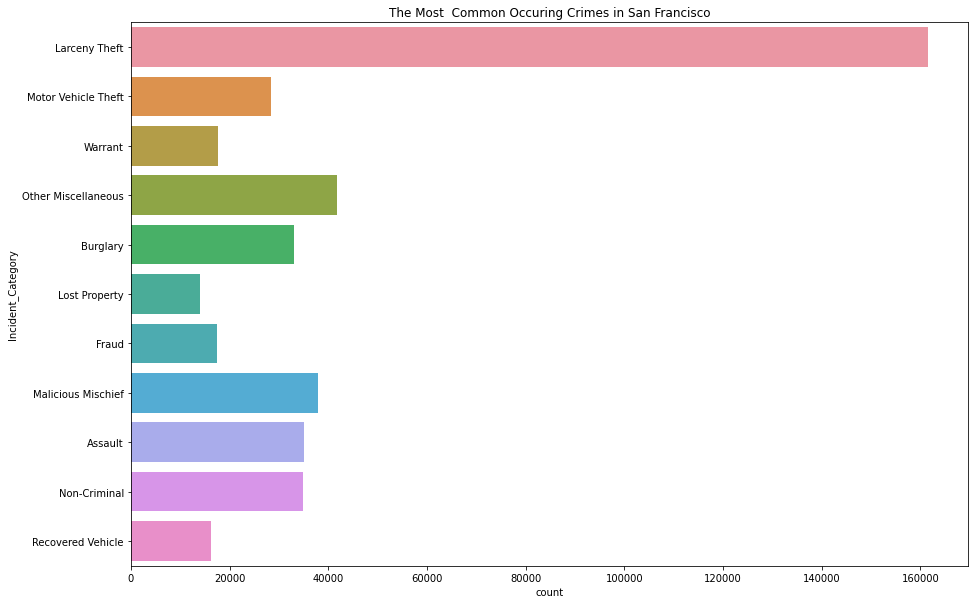

In [25]:
fig, count = plt.subplots(figsize = (15,10))
count = sns.countplot(y = reduced_cat['Incident_Category'])
count.set_title('The Most  Common Occuring Crimes in San Francisco')  

# **LARCENY THEFT**

In [26]:
Larceny_Theft = reduced_cat.loc[reduced_cat['Incident_Category'] == 'Larceny Theft']
Larceny_Theft

Incident_Date Incident_Time Incident_Day_of_Week  \
0         2019/03/05         21:00              Tuesday   
2         2018/08/24         17:30               Friday   
5         2019/02/12         07:00              Tuesday   
17        2018/11/18         20:20               Sunday   
18        2019/04/06         23:30             Saturday   
...              ...           ...                  ...   
554697    2020/06/04         16:00             Thursday   
554702    2020/07/30         02:14             Thursday   
554706    2020/07/16         16:00             Thursday   
554708    2020/08/01         17:34             Saturday   
554710    2020/10/24         17:00             Saturday   

               Report_Datetime       Row_ID  Incident_ID  Incident_Number  \
0       2019/03/07 12:54:00 PM  77808706372       778087        196048512   
2       2018/08/24 07:35:00 PM  70675306243       706753        180639339   
5       2019/02/12 09:20:00 AM  76962406304       769624        190106328   
17      2018/11/18 09:10:00 PM  73895706244       738957        180875862   
18      2019/04/07 01:55:00 PM  78913106154       789131        196071002   
...                        ...          ...          ...              ...   
554697  2020/06/05 11:37:00 AM  93320406244       933204        206090003   
554702  2020/07/30 02:36:00 PM  94844606244       948446        200456760   
554706  2020/07/17 01:26:00 PM  94458906301       944589        200427733   
554708  2020/08/01 06:04:00 PM  94911806361       949118        200461010   
554710  2020/10/24 06:34:00 PM  97231606244       972316        200642975   

       Report_Type_Code Report_Type_Description  Filed_Online  ...  \
0                    II        Coplogic Initial          True  ...   
2                    II                 Initial         False  ...   
5                    II                 Initial         False  ...   
17                   II                 Initial         False  ...   
18                   IS      Initial Supplement         False  ...   
...                 ...                     ...           ...  ...   
554697               II        Coplogic Initial          True  ...   
554702               II                 Initial         False  ...   
554706               II                 Initial         False  ...   
554708               II                 Initial         False  ...   
554710               II                 Initial         False  ...   

                 Incident_Subcategory  \
0               Larceny Theft - Other   
2              Larceny - From Vehicle   
5       Larceny Theft - From Building   
17             Larceny - From Vehicle   
18              Larceny Theft - Other   
...                               ...   
554697         Larceny - From Vehicle   
554702         Larceny - From Vehicle   
554706  Larceny Theft - From Building   
554708    Larceny Theft - Shoplifting   
554710         Larceny - From Vehicle   

                                     Incident_Description      Resolution  \
0                         Theft, Other Property, $50-$200  Open or Active   
2                   Theft, From Locked Vehicle, $200-$950  Open or Active   
5                             Theft, From Building, >$950  Open or Active   
17                      Theft, From Locked Vehicle, >$950  Open or Active   
18      Theft, From Person, >$950 (other than Pickpocket)  Open or Active   
...                                                   ...             ...   
554697                  Theft, From Locked Vehicle, >$950  Open or Active   
554702                  Theft, From Locked Vehicle, >$950  Open or Active   
554706                         Theft, From Building, <$50  Open or Active   
554708                           Theft, Shoplifting, <$50  Open or Active   
554710                  Theft, From Locked Vehicle, >$950  Open or Active   

               CNN Police_District           Analysis_Neighborhood  \
0       30044000.0      Tenderloin          

In [27]:
Larceny_Theft.value_counts()

Incident_Date  Incident_Time  Incident_Day_of_Week  Report_Datetime         Row_ID        Incident_ID  Incident_Number  Report_Type_Code  Report_Type_Description  Filed_Online  Incident_Code  Incident_Category  Incident_Subcategory    Incident_Description                                     Resolution      CNN         Police_District  Analysis_Neighborhood           Supervisor_District  Latitude   Longitude    year
2018/01/01     00:00          Monday                2018/01/01 02:45:00 PM  61926806244   619268       180001374        IS                Coplogic Supplement      True          6244           Larceny Theft      Larceny - From Vehicle  Theft, From Locked Vehicle, >$950                        Open or Active  34133000.0  Southern         Treasure Island                 6.0                  37.824524  -122.375593  2018    1
2020/08/29     10:56          Saturday              2020/08/29 02:17:00 PM  95737706244   957377       206127725        II                Coplogic Initial   

In [28]:
df2['Incident_Category'].value_counts()

Larceny Theft          161531
Other Miscellaneous     41850
Malicious Mischief      37898
Assault                 35127
Non-Criminal            34893
Burglary                32993
Motor Vehicle Theft     28478
Warrant                 17602
Fraud                   17507
Recovered Vehicle       16146
Lost Property           14087
Name: Incident_Category, dtype: int64

In [29]:
Larceny_Theft['Incident_Description'].unique()

array(['Theft, Other Property, $50-$200',
       'Theft, From Locked Vehicle, $200-$950',
       'Theft, From Building, >$950', 'Theft, From Locked Vehicle, >$950',
       'Theft, From Person, >$950 (other than Pickpocket)',
       'Theft, From Building, <$50',
       'Theft, From Unlocked Vehicle, >$950',
       'Theft, Other Property, >$950',
       'Theft of Computers or Cell Phones', 'Theft, Shoplifting, <$50',
       'License Plate, Stolen', 'Theft, From Building, $50-$200',
       'Theft, Shoplifting, $50-$200', 'Theft, Pickpocket, $50-$200',
       'Theft, From Locked Vehicle, $50-$200',
       'Theft, Other Property, <$50', 'Theft from Merchant or Library',
       'Theft, Shoplifting, $200-$950',
       'Theft, From Locked Vehicle, <$50',
       'Theft, Other Property, $200-$950',
       'Theft, From Unlocked Vehicle, $200-$950',
       'Theft, Pickpocket, >$950', 'Theft of Animals (general)',
       'Theft of Checks or Credit Cards', 'Theft, Shoplifting, >$950',
       'Theft,

Text(0.5, 1.0, 'Larceny Theft Descriptions Count')

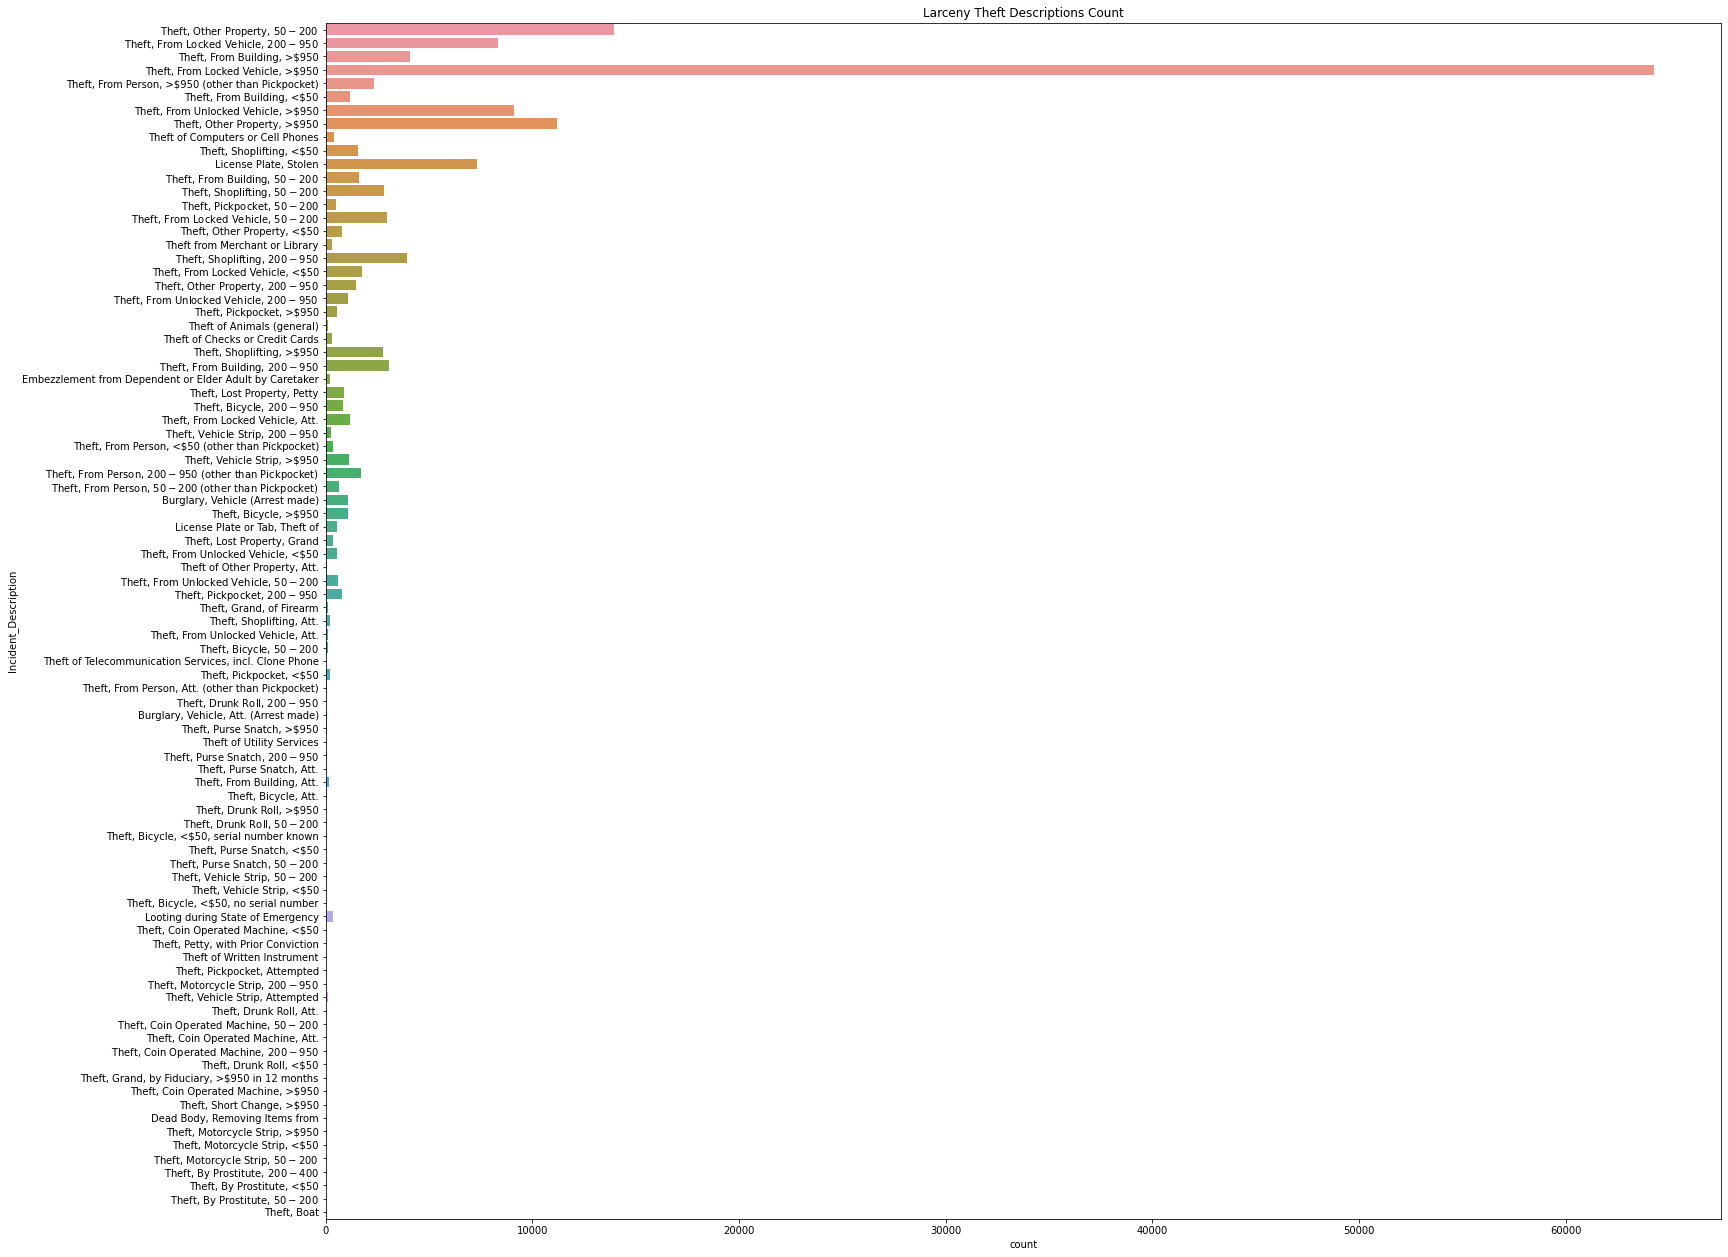

In [30]:
fig, count = plt.subplots(figsize = (25,22))
count = sns.countplot(y = Larceny_Theft['Incident_Description'])
count.set_title('Larceny Theft Descriptions Count')

# **ASSAULT**

In [31]:
Assault= reduced_cat.loc[reduced_cat['Incident_Category'] == 'Assault']
Assault

Incident_Date Incident_Time Incident_Day_of_Week  \
13        2019/05/24         18:45               Friday   
29        2018/08/18         10:58             Saturday   
40        2018/10/04         23:20             Thursday   
106       2018/11/19         06:25               Monday   
136       2019/06/17         19:30               Monday   
...              ...           ...                  ...   
554650    2020/11/24         07:15              Tuesday   
554668    2020/08/15         19:05             Saturday   
554693    2021/01/16         21:19             Saturday   
554695    2020/10/01         13:54             Thursday   
554701    2020/12/15         20:45              Tuesday   

               Report_Datetime       Row_ID  Incident_ID  Incident_Number  \
13      2019/05/24 06:49:00 PM  80450804134       804508        190372723   
29      2018/08/18 11:11:00 AM  70439704092       704397        180621079   
40      2018/10/10 11:30:00 AM  72468904013       724689        180753387   
106     2018/11/19 06:27:00 AM  73913804014       739138        180876274   
136     2019/06/17 08:52:00 PM  81267904134       812679        190436959   
...                        ...          ...          ...              ...   
554650  2020/11/24 07:20:00 AM  98113304134       981133        200709650   
554668  2020/08/15 07:28:00 PM  95314804134       953148        200491186   
554693  2021/01/16 09:20:00 PM  99701904092       997019        210036716   
554695  2020/10/02 11:37:00 AM  96622404134       966224        200593334   
554701  2020/12/15 08:46:00 PM  98727104144       987271        200756043   

       Report_Type_Code Report_Type_Description  Filed_Online  ...  \
13                   II                 Initial         False  ...   
29                   II                 Initial         False  ...   
40                   IS      Initial Supplement         False  ...   
106                  II                 Initial         False  ...   
136                  II                 Initial         False  ...   
...                 ...                     ...           ...  ...   
554650               II                 Initial         False  ...   
554668               II                 Initial         False  ...   
554693               IS      Initial Supplement         False  ...   
554695               II                 Initial         False  ...   
554701               II                 Initial         False  ...   

        Incident_Subcategory                  Incident_Description  \
13            Simple Assault                               Battery   
29        Aggravated Assault           Assault, Aggravated, W/ Gun   
40        Aggravated Assault  Assault, Aggravated, W/ Other Weapon   
106       Aggravated Assault         Assault, Aggravated, W/ Force   
136           Simple Assault                               Battery   
...                      ...                                   ...   
554650        Simple Assault                               Battery   
554668        Simple Assault                               Battery   
554693    Aggravated Assault           Assault, Aggravated, W/ Gun   
554695        Simple Assault                               Battery   
554701        Simple Assault                       Battery, Sexual   

                  Resolution         CNN Police_District  \
13            Open or Active  25206000.0         Central   
29            Open or Active  20572000.0         Bayview   
40            Open or Active  26282000.0            Park   
106           Open or Active  25968000.0        Northern   
136           Open or Active  24171000.0         Mission   
...                      ...         ...             ...   
554650        Open or Active  23888000.0        Southern   
554668        Open or Active  24945000.0      Tenderloin   
554693  Cite or Arrest Adult  24897000.0      Tenderloin   
554695        Open or Active  27112000.0         Taraval   
554701        Open or Active  2

In [32]:
Assault['Incident_Description'].unique()

array(['Battery', 'Assault, Aggravated, W/ Gun',
       'Assault, Aggravated, W/ Other Weapon',
       'Assault, Aggravated, W/ Force',
       'Assault to Commit Mayhem or Specific Sex Offenses',
       'Shooting into Inhabited Dwelling or Occupied Vehicle',
       'Assault, Aggravated, W/ Knife',
       'Battery, former Spouse or Dating Relationship',
       'Assault, W/ Caustic Chemical to Injure or Disfigure',
       'Battery with Serious Injuries', 'Battery, Sexual',
       'Assault, Att. Homicide, W/ Knife', 'False Imprisonment',
       'Battery, Of A Police Officer',
       'Assault, Att. Homicide, W/ Other Weapon',
       'Assault, Non-Aggravated', 'Assault, Att. Homicide, W/ Gun',
       'Assault, Non-Aggravated, Att.',
       'Assault, Aggravated, On Police Off., W/ Other Weapon',
       'Firearm, Discharging at Unoccupied Bldg, Vehicle or Aircraft',
       'Assault, Aggravated, On Police Officer, W/ Force',
       'Firearm, Discharging in Grossly Negligent Manner',
       'As

In [33]:
Assault.value_counts()

Incident_Date  Incident_Time  Incident_Day_of_Week  Report_Datetime         Row_ID        Incident_ID  Incident_Number  Report_Type_Code  Report_Type_Description  Filed_Online  Incident_Code  Incident_Category  Incident_Subcategory  Incident_Description                                  Resolution      CNN         Police_District  Analysis_Neighborhood           Supervisor_District  Latitude   Longitude    year
2018/01/01     00:55          Monday                2018/01/01 01:41:00 AM  61869104134   618691       180000172        II                Initial                  False         4134           Assault            Simple Assault        Battery                                               Open or Active  23866000.0  Mission          Mission                         10.0                 37.768473  -122.405828  2018    1
2020/10/17     20:07          Saturday              2020/10/17 08:07:00 PM  97039304011   970393       200627381        II                Initial                  Fals

Text(0.5, 1.0, 'Different Assualt Descriptions Count')

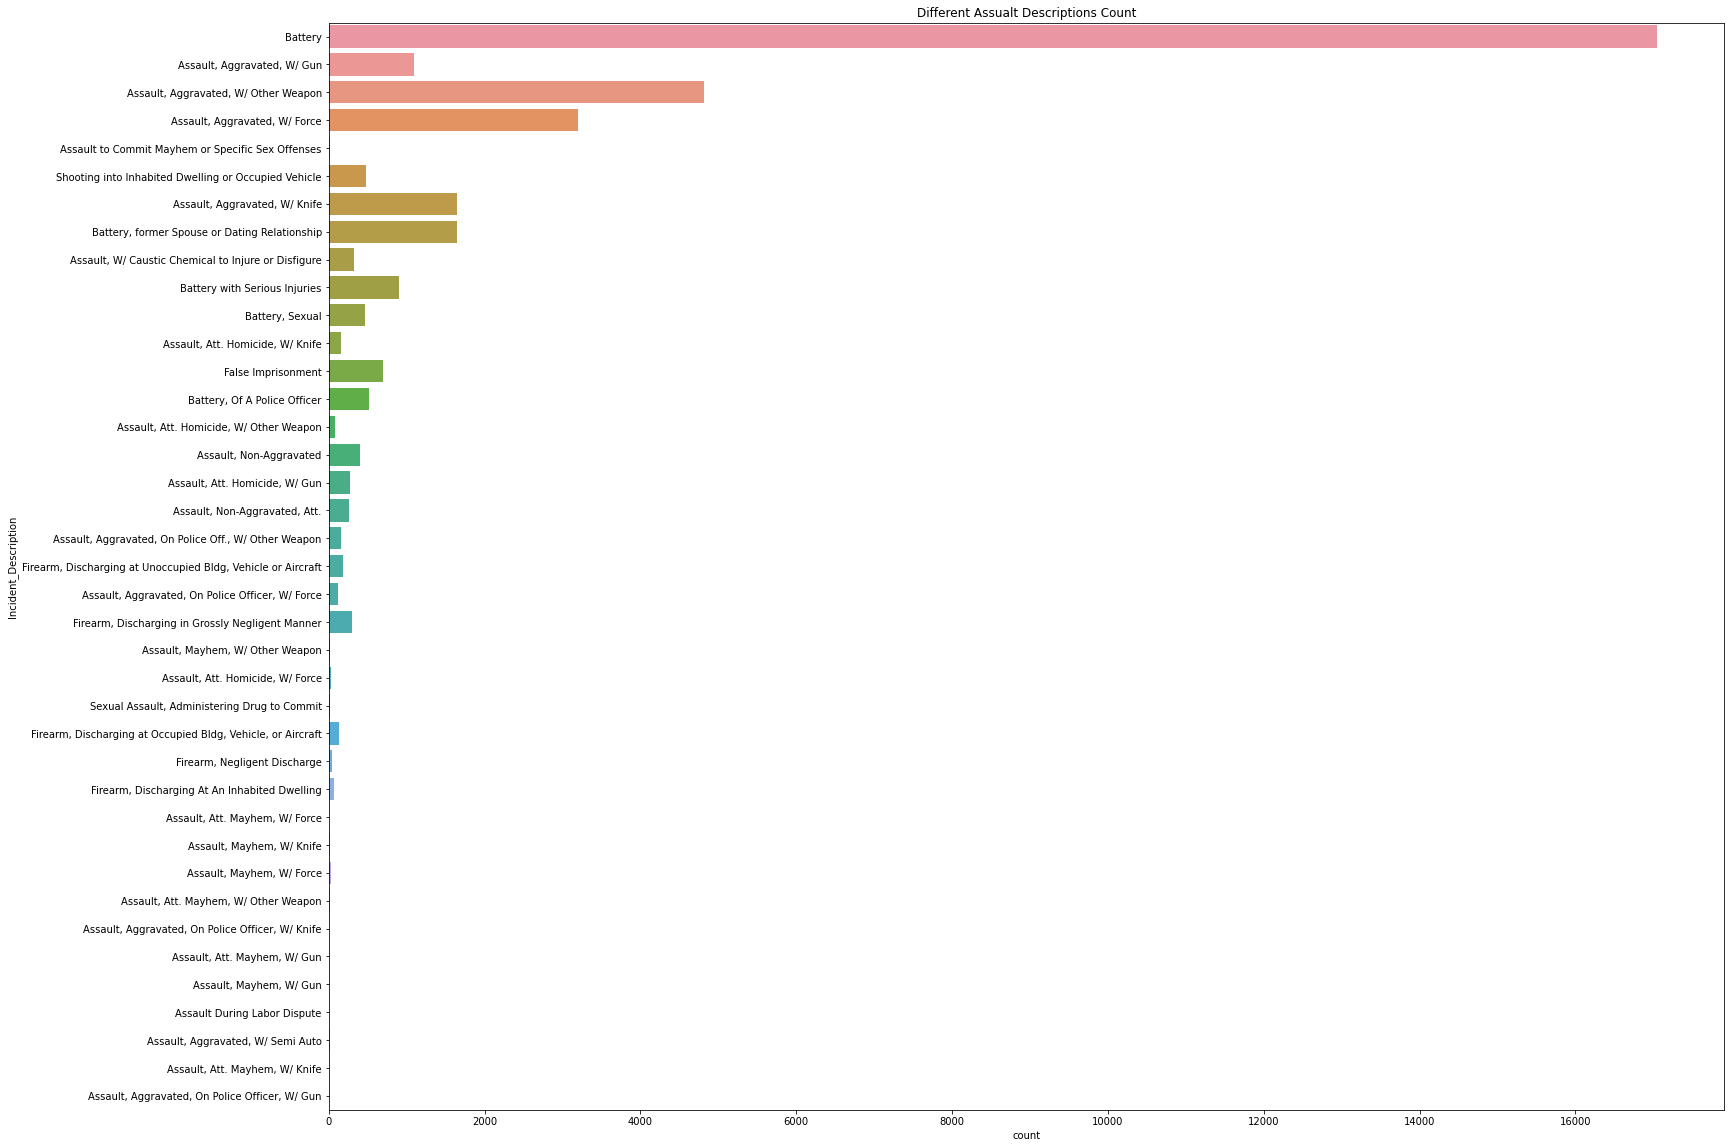

In [34]:
fig, count = plt.subplots(figsize = (25,20))
count = sns.countplot(y = Assault['Incident_Description'])
count.set_title('Different Assualt Descriptions Count')

# **BURGLARY**

In [35]:
Burglary = reduced_cat.loc[reduced_cat['Incident_Category'] == 'Burglary']
Burglary

Incident_Date Incident_Time Incident_Day_of_Week  \
7         2018/10/04         09:00             Thursday   
50        2018/12/05         09:30            Wednesday   
102       2019/04/01         02:00               Monday   
206       2019/02/26         18:15              Tuesday   
212       2018/09/07         06:00               Friday   
...              ...           ...                  ...   
554646    2020/05/11         16:45               Monday   
554658    2020/10/02         08:30               Friday   
554659    2020/05/25         05:40               Monday   
554686    2020/07/24         00:30               Friday   
554709    2020/06/01         01:55               Monday   

               Report_Datetime       Row_ID  Incident_ID  Incident_Number  \
7       2018/10/04 09:00:00 AM  72557805053       725578        180561958   
50      2019/02/12 02:17:00 AM  76958505073       769585        180918832   
102     2019/04/02 03:45:00 PM  78614505151       786145        190233614   
206     2019/02/27 03:22:00 PM  77455105073       774551        190146108   
212     2018/09/07 06:14:00 AM  71167605073       711676        180676228   
...                        ...          ...          ...              ...   
554646  2020/05/18 09:34:00 AM  92790805041       927908        200301745   
554658  2020/10/20 09:45:00 AM  97128505073       971285        200593641   
554659  2020/05/25 05:43:00 AM  92988005012       929880        200316067   
554686  2020/07/24 11:07:00 PM  94773405073       947734        200443898   
554709  2020/06/01 01:55:00 AM  93192005061       931920        200330863   

       Report_Type_Code Report_Type_Description  Filed_Online  ...  \
7                    IS      Initial Supplement         False  ...   
50                   IS     Coplogic Supplement          True  ...   
102                  II                 Initial         False  ...   
206                  II                 Initial         False  ...   
212                  II                 Initial         False  ...   
...                 ...                     ...           ...  ...   
554646               II                 Initial         False  ...   
554658               IS     Coplogic Supplement          True  ...   
554659               II                 Initial         False  ...   
554686               IS     Coplogic Supplement          True  ...   
554709               II                 Initial         False  ...   

          Incident_Subcategory  \
7        Burglary - Commercial   
50            Burglary - Other   
102           Burglary - Other   
206           Burglary - Other   
212           Burglary - Other   
...                        ...   
554646  Burglary - Residential   
554658        Burglary - Other   
554659  Burglary - Residential   
554686        Burglary - Other   
554709   Burglary - Commercial   

                                  Incident_Description            Resolution  \
7                      Burglary, Store, Unlawful Entry  Cite or Arrest Adult   
50               Burglary, Other Bldg., Unlawful Entry        Open or Active   
102          Burglary, Non-residential, Forcible Entry        Open or Active   
206              Burglary, Other Bldg., Unlawful Entry        Open or Active   
212              Burglary, Other Bldg., Unlawful Entry        Open or Active   
...                                                ...                   ...   
554646             Burglary, Residence, Forcible Entry        Open or Active   
554658           Burglary, Other Bldg., Unlawful Entry        Open or Active   
554659  Burglary, Apartment House, Att. Forcible Entry  Cite or Arrest Adult   
554686           Burglary, Other Bldg., Unlawful Entry        Open or Active   
554709             Burglary, Warehouse, Forcible Entry        Open or Active   

               CNN Police_District           Analysis_Neighborhood  \
7       24739000.0         Central  Financial District/South Beach   
50      25703000.0    

In [36]:
Burglary['Incident_Description'].unique()

array(['Burglary, Store, Unlawful Entry',
       'Burglary, Other Bldg., Unlawful Entry',
       'Burglary, Non-residential, Forcible Entry',
       'Burglary, Residence, Forcible Entry',
       'Burglary, Apartment House, Unlawful Entry',
       'Burglary, Residence, Unlawful Entry',
       'Burglary, Hot Prowl, Forcible Entry',
       'Burglary, Non-residential, Unlawful Entry',
       'Burglary, Apartment House, Forcible Entry',
       'Burglary, Hot Prowl, Att. Forcible Entry',
       'Burglary, Apartment House, Att. Forcible Entry',
       'Burglary, Store, Forcible Entry',
       'Burglary, Hot Prowl, Unlawful Entry',
       'Burglary, Flat, Forcible Entry',
       'Burglary, Other Bldg., Forcible Entry',
       'Burglary, Residence, Att. Forcible Entry',
       'Burglary, Warehouse, Forcible Entry',
       'Burglary, Other Bldg., Att. Forcible Entry',
       'Burglary, Flat Under Constr., Forcible Entry',
       'Burglary, Residence Under Constr, Forcible Entry',
       'Burglar

In [37]:
Burglary.value_counts()

Incident_Date  Incident_Time  Incident_Day_of_Week  Report_Datetime         Row_ID        Incident_ID  Incident_Number  Report_Type_Code  Report_Type_Description  Filed_Online  Incident_Code  Incident_Category  Incident_Subcategory    Incident_Description                       Resolution      CNN         Police_District  Analysis_Neighborhood           Supervisor_District  Latitude   Longitude    year
2018/01/01     00:01          Monday                2018/10/05 12:01:00 PM  72240305013   722403       180754545        II                Initial                  False         5013           Burglary           Burglary - Residential  Burglary, Apartment House, Unlawful Entry  Open or Active  26801000.0  Park             Western Addition                2.0                  37.782239  -122.440963  2018    1
2020/12/29     22:30          Tuesday               2020/12/30 09:24:00 AM  99140105083   991401       200787195        II                Initial                  False         5083    

Text(0.5, 1.0, 'Differnt Burglary Descriptions Count')

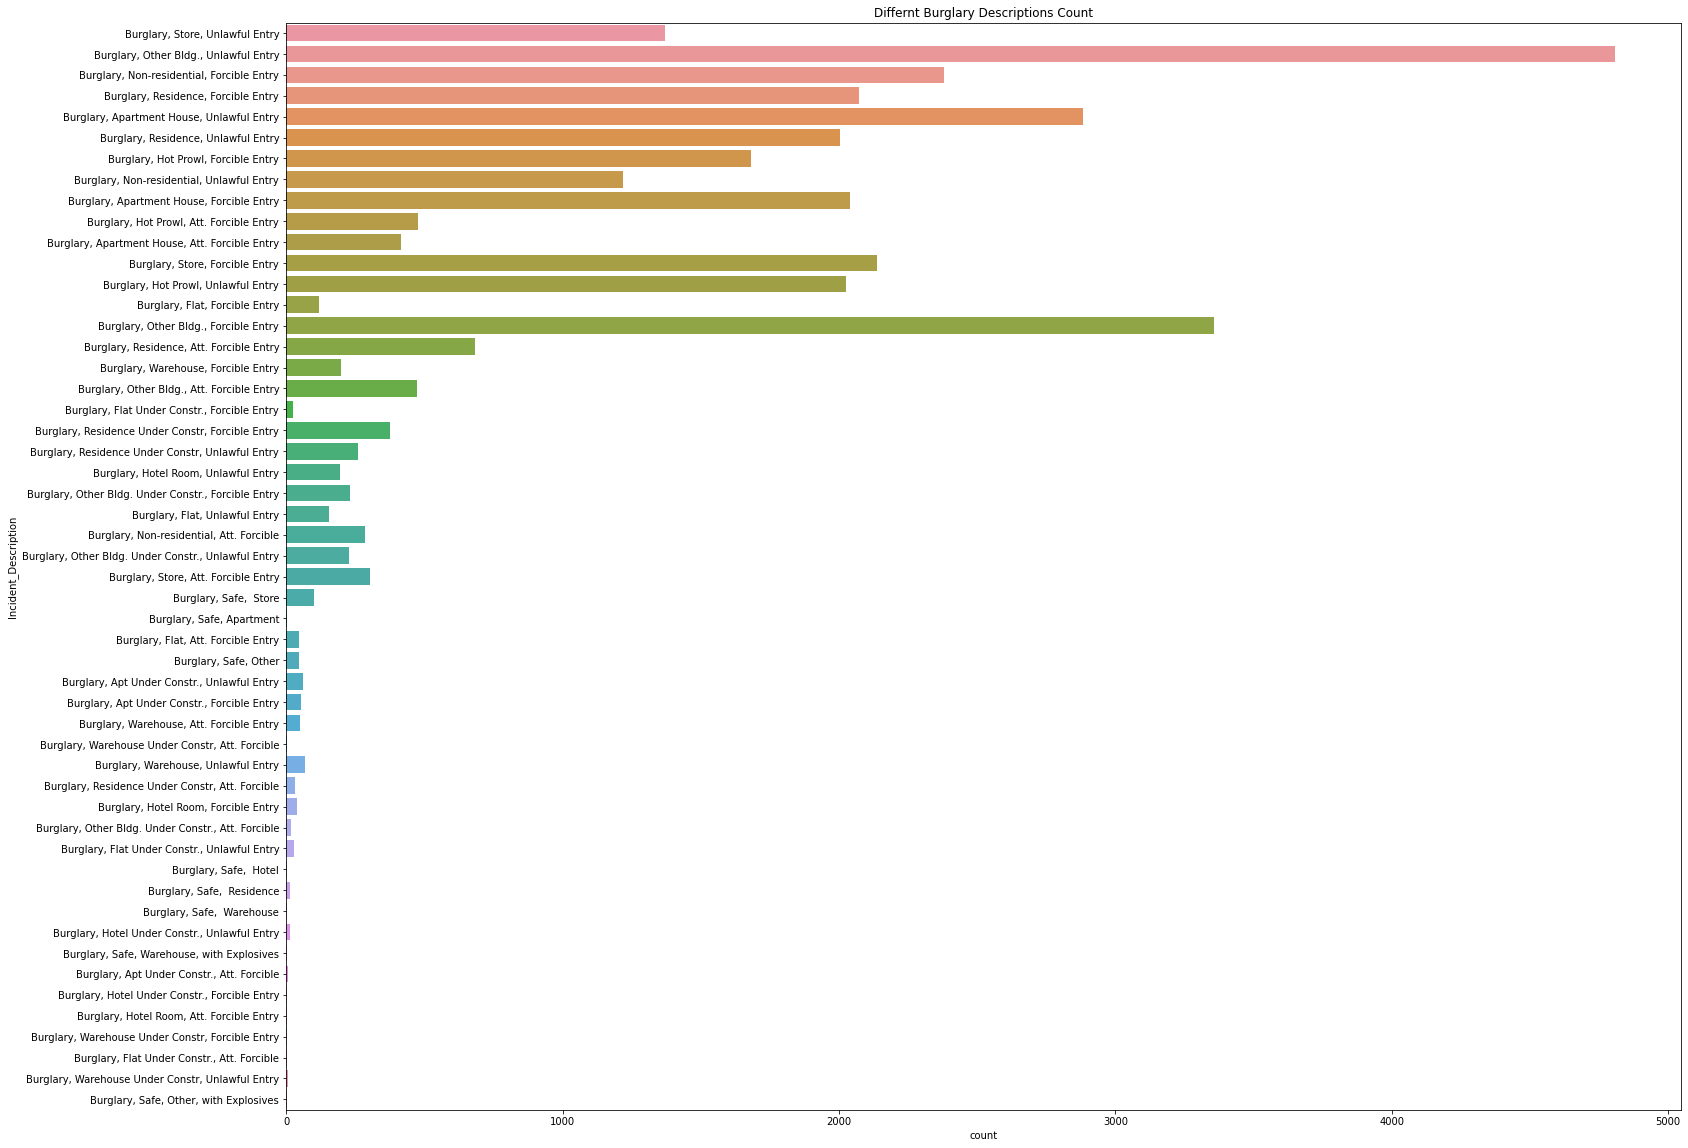

In [38]:
fig, count = plt.subplots(figsize = (25,20))
count = sns.countplot(y = Burglary['Incident_Description'])
count.set_title('Differnt Burglary Descriptions Count')

# **POLICE DISTRICTS**

Text(0.5, 1.0, 'Different Police District vs Count')

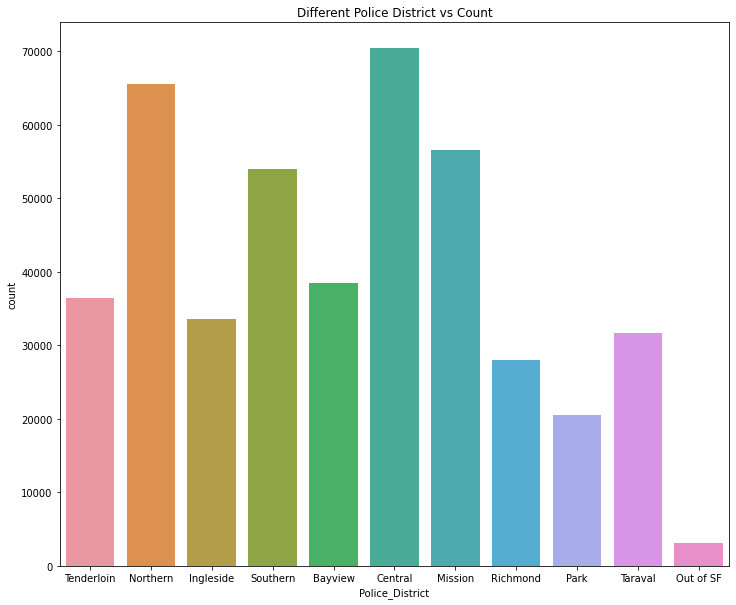

In [39]:
fig, count = plt.subplots(figsize = (12,10))
count = sns.countplot(x = df2['Police_District'])
count.set_title('Different Police District vs Count')

In [40]:
district_category = pd.crosstab(df2['Incident_Category'], df2['Police_District'])
district_category

Police_District      Bayview  Central  Ingleside  Mission  Northern  \
Incident_Category                                                     
Assault                 4078     3970       2802     5825      3886   
Burglary                2524     4835       2924     3812      5761   
Fraud                   1246     2504       1678     1813      2271   
Larceny Theft           9930    34036       9493    17625     30987   
Lost Property            740     2790        678     1962      1790   
Malicious Mischief      3813     6093       3275     4892      5430   
Motor Vehicle Theft     4686     2309       3874     3781      3247   
Non-Criminal            2504     4856       2976     4296      3927   
Other Miscellaneous     3707     6017       3184     7327      4827   
Recovered Vehicle       3913      835       1804     1811      1719   
Warrant                 1367     2145        894     3335      1730   

Police_District      Out of SF  Park  Richmond  Southern  Taraval  Tenderloin  
Incident_Category                                                              
Assault                    135  1112      1190      4656     1901        5572  
Burglary                    40  2222      2327      4522     2569        1457  
Fraud                      805   727      1282      1947     2249         985  
Larceny Theft              489  7860     12954     18155    11479        8523  
Lost Property              530   444       715      1927     1063        1448  
Malicious Mischief          65  1931      2277      4953     2848        2321  
Motor Vehicle Theft        273  1501      1873      2913     2756        1265  
Non-Criminal               187  1821      2139      4731     2867        4589  
Other Miscellaneous        226  1482      1885      5717     2179        5299  
Recovered Vehicle          181   606       933      1939     1113        1292  
Warrant                    141   756       439      2507      621        3667

Text(0.5, 1.0, 'Different Categories and    Districts')

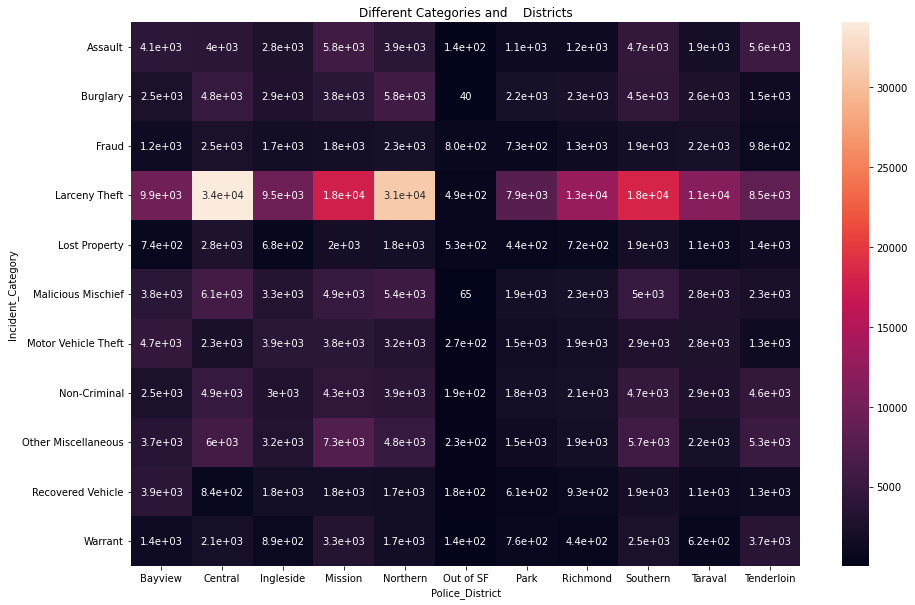

In [41]:
fig, heatmap = plt.subplots(figsize = (15,10))
heatmap = sns.heatmap(district_category, annot=True)
heatmap.set_title('Different Categories and    Districts')

Text(0.5, 1.0, 'Categories Count vs  District')

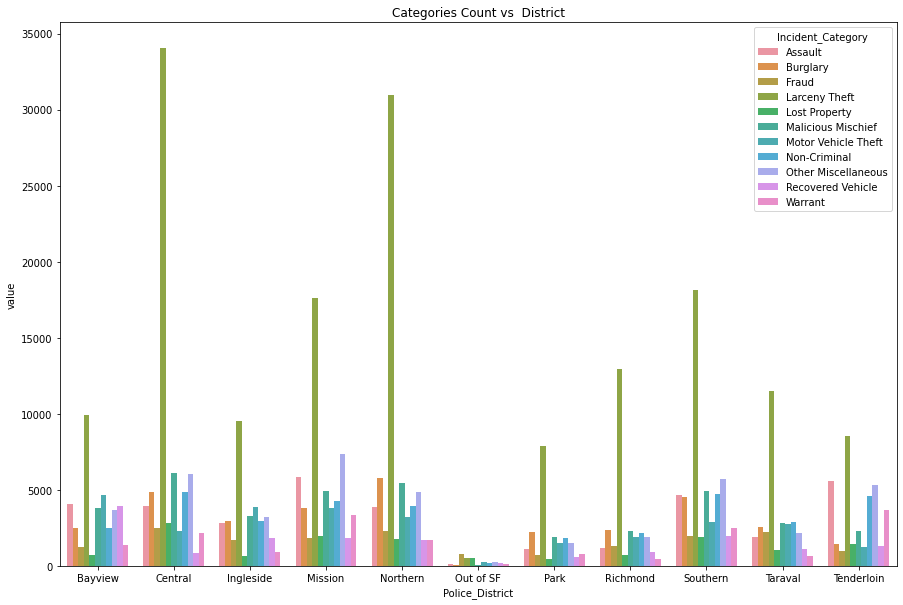

In [42]:
df3 = district_category.stack().reset_index().rename(columns={0:'value'})
fig, bar = plt.subplots(figsize = (15,10))
bar = sns.barplot(x=df3['Police_District'], y=df3['value'], hue=df3['Incident_Category'])
bar.set_title('Categories Count vs  District')

In [43]:
df4 = pd.DataFrame(df2.groupby('year')['Incident_Category'].count())
#df5['Incident_Year'] = df5['Incident_Year'].astype(int)
df4.reset_index(inplace=True)
df4

year  Incident_Category
0  2018             113398
1  2019             109954
2  2020              88457
3  2021              97262
4  2022              29041

# **Crime Counts from the 2018 - 2022**

[Text(2017.5, 0, '0'),
 Text(2018.0, 0, '2018'),
 Text(2018.5, 0, '2018.5'),
 Text(2019.0, 0, '2019'),
 Text(2019.5, 0, '2019.5'),
 Text(2020.0, 0, '2020'),
 Text(2020.5, 0, '2020.5'),
 Text(2021.0, 0, '2021'),
 Text(2021.5, 0, '2021.5'),
 Text(2022.0, 0, '2022'),
 Text(2022.5, 0, '')]

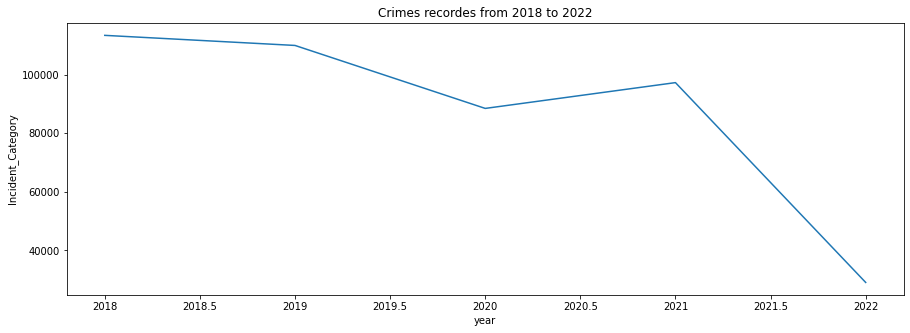

In [44]:
fig, line = plt.subplots(figsize = (15,5))
line = sns.lineplot(x = df4['year'], y=df4['Incident_Category'])
line.set_title('Crimes recordes from 2018 to 2022')
line.set_xticklabels([0,2018, 2018.5,2019, 2019.5,2020, 2020.5,2021, 2021.5,2022])

In [45]:
year_category = pd.crosstab(df2['year'], df2['Incident_Category'])
year_category

Incident_Category  Assault  Burglary  Fraud  Larceny Theft  Lost Property  \
year                                                                        
2018                  9041      7041   4727          44186           4693   
2019                  8855      5949   4640          44163           4338   
2020                  6982      9124   3653          28178           2094   
2021                  7752      8674   3390          34569           2192   
2022                  2497      2205   1097          10435            770   

Incident_Category  Malicious Mischief  Motor Vehicle Theft  Non-Criminal  \
year                                                                       
2018                             8459                 5240          9536   
2019                             8617                 5311          8995   
2020                             8447                 7464          6762   
2021                             9628                 7878          7504   
2022                             2747                 2585          2096   

Incident_Category  Other Miscellaneous  Recovered Vehicle  Warrant  
year                                                                
2018                             11712               3237     5526  
2019                             10599               3113     5374  
2020                              8434               4112     3207  
2021                              8714               4299     2662  
2022                              2391               1385      833

#  **Most Occuring Crimes over the Years**

Text(0.5, 1.0, 'Different crimes from 2018 - 2022')

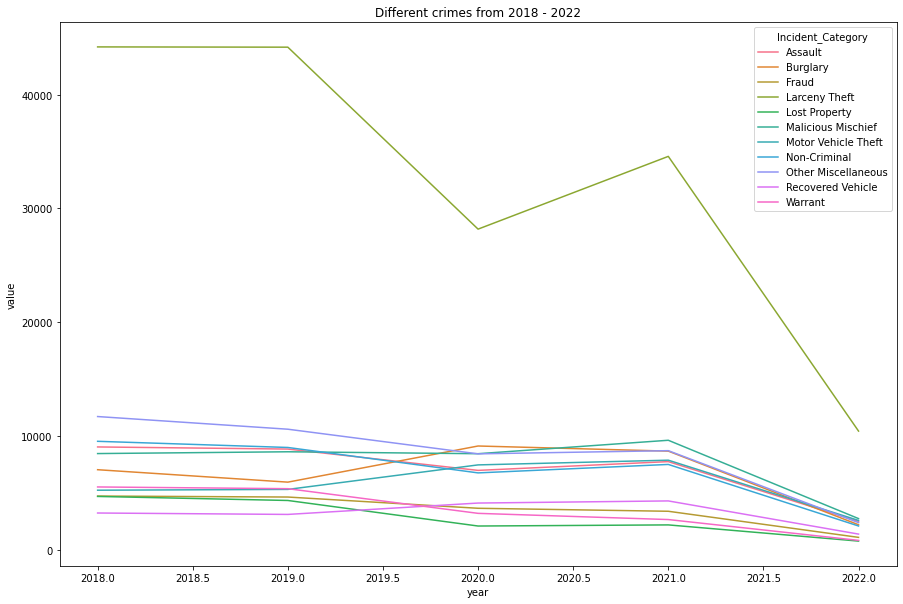

In [46]:
stack = year_category.stack().reset_index().rename(columns={0:'value'})
fit = stack['year'] != 2022
stacked = stack[fit]
fig, count = plt.subplots(figsize = (15,10))
line = sns.lineplot(x=stack['year'], y=stack['value'], hue=stack['Incident_Category'])
line.set_title('Different crimes from 2018 - 2022')

# Total Crime Count on different days

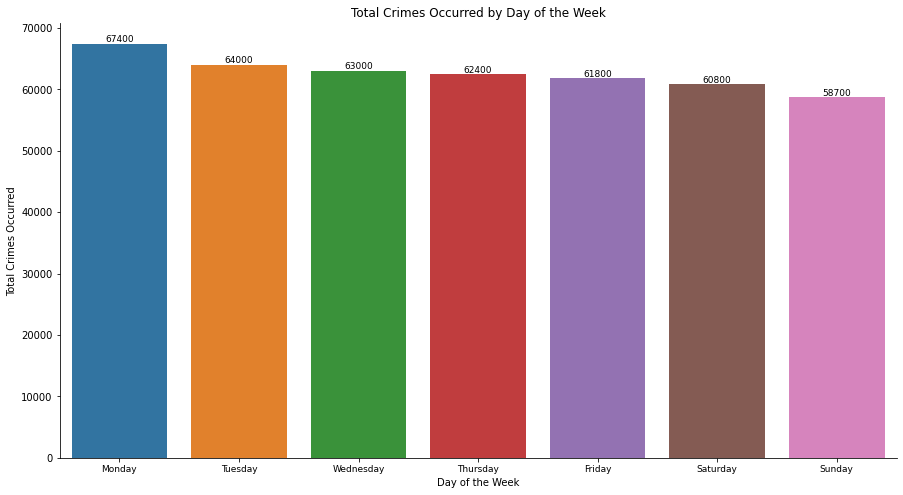

In [47]:
fig, ax = plt.subplots()

sns.barplot(x = df2["Incident_Day_of_Week"].value_counts().index, y = df2["Incident_Day_of_Week"].value_counts())

ax.set_title("Total Crimes Occurred by Day of the Week")
ax.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], fontsize=9)
ax.set_xlabel("Day of the Week")
ax.set_ylabel("Total Crimes Occurred")

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine()

# Occurance of different types of crimes in San Francisco in 2018

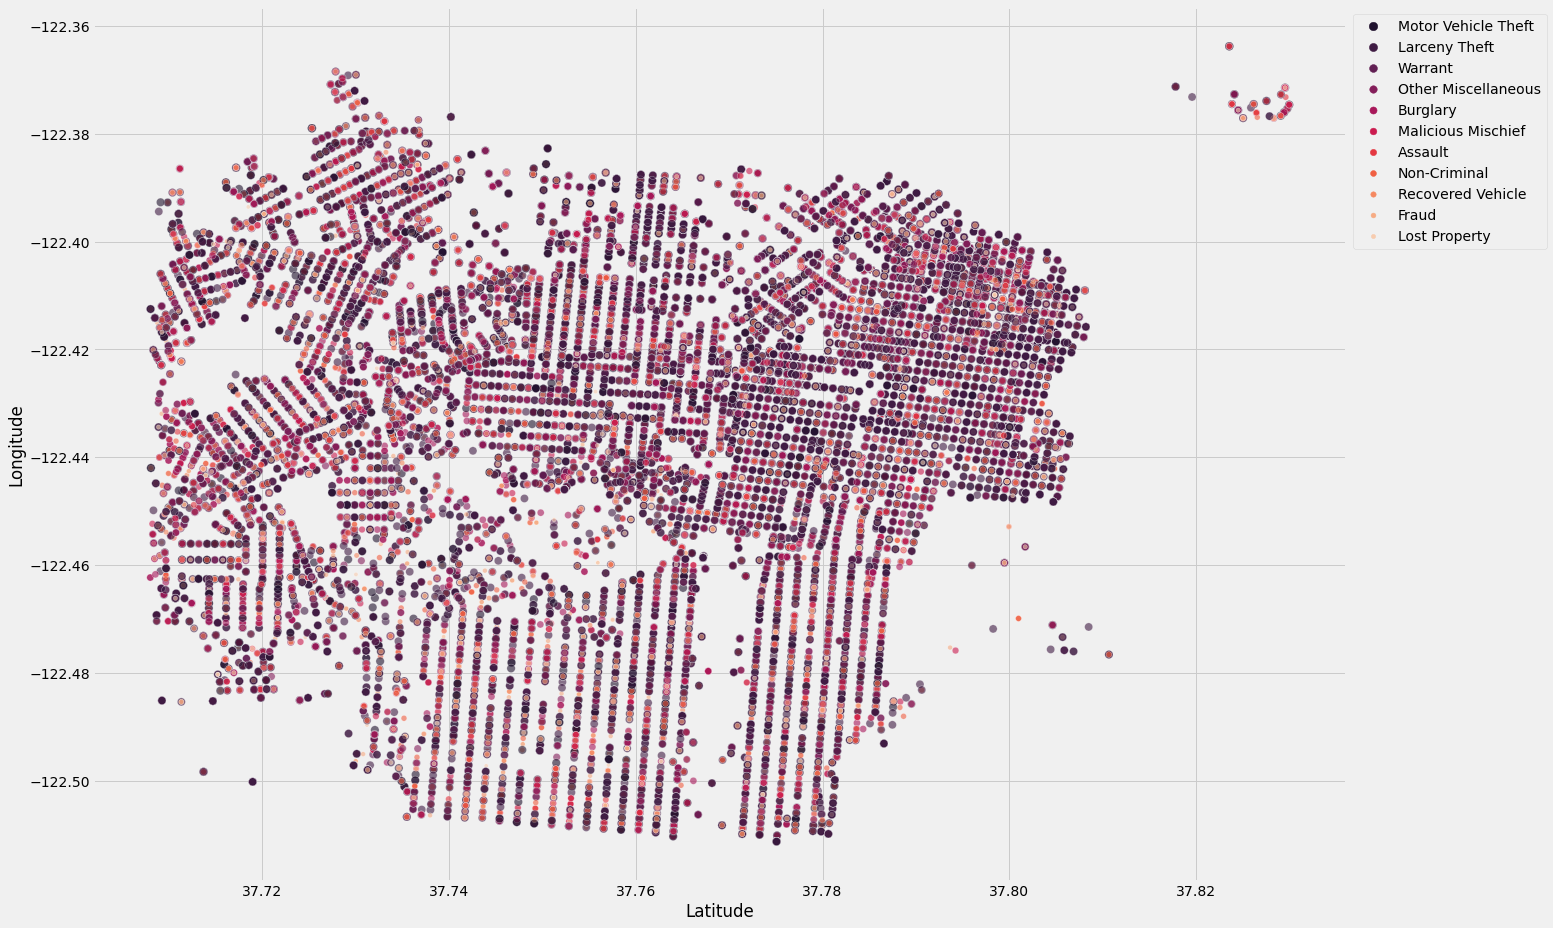

In [48]:
  with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(1, 1, figsize=(20, 15))
  
    sns.scatterplot(data=df2[df2['year']==2018], x='Latitude', y='Longitude', alpha=0.6, palette='rocket', hue='Incident_Category', size='Incident_Category') 

    plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')

# Occurance of different types of crimes in San Francisco in 2019

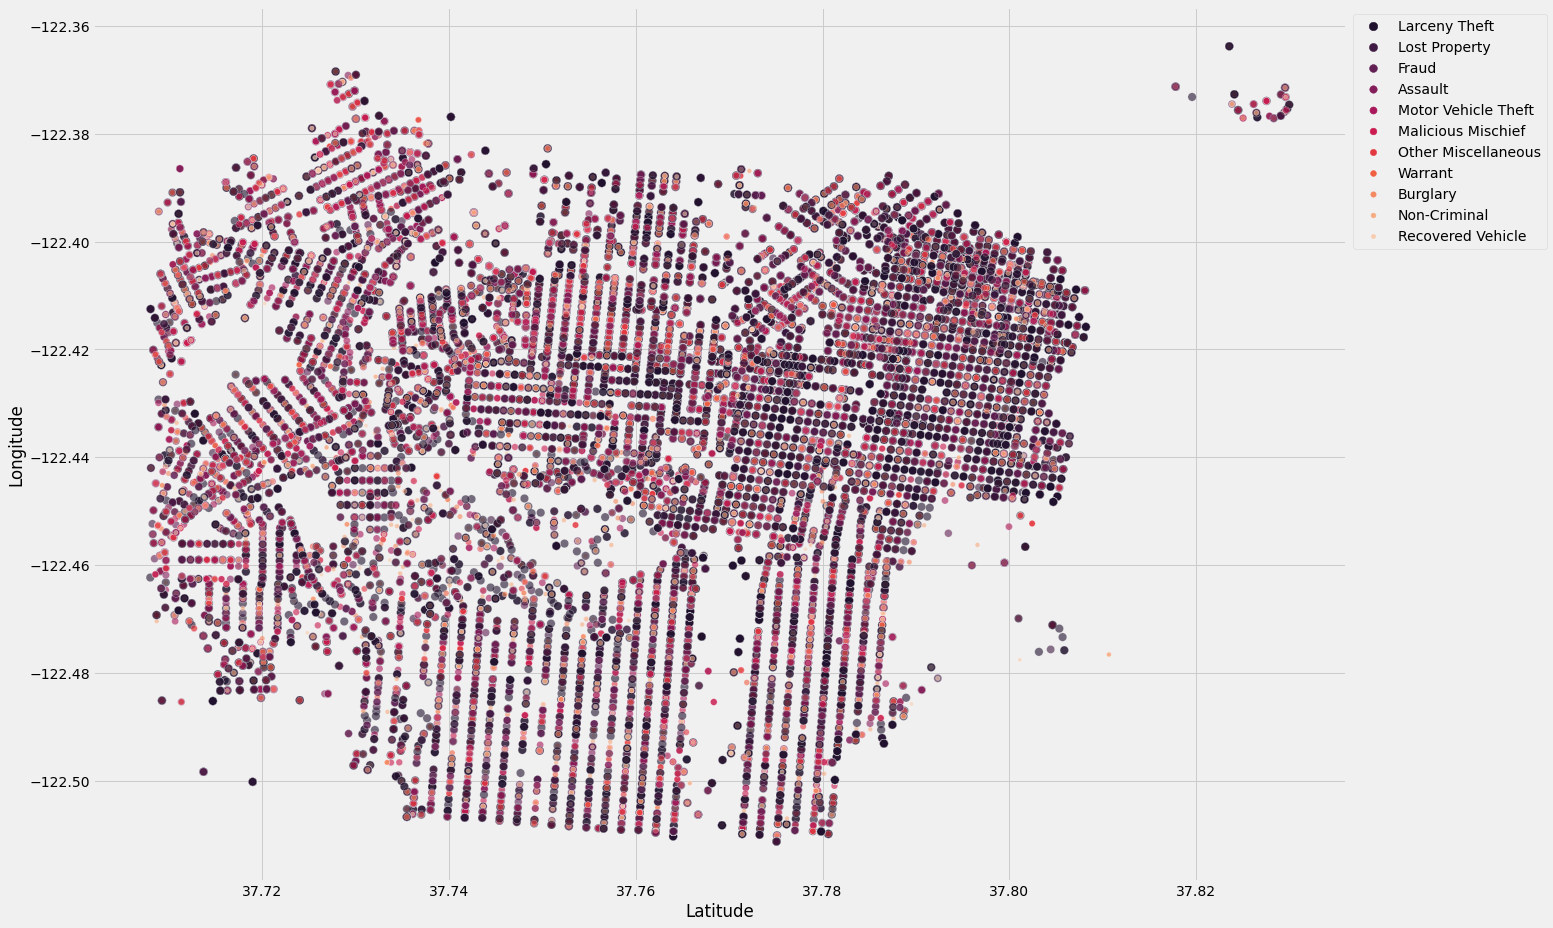

In [49]:
  with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(1, 1, figsize=(20, 15))
  
    sns.scatterplot(data=df2[df2['year']==2019], x='Latitude', y='Longitude', alpha=0.6, palette='rocket', hue='Incident_Category', size='Incident_Category') 

    plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')

# Occurance of different types of crimes in San Francisco in 2020

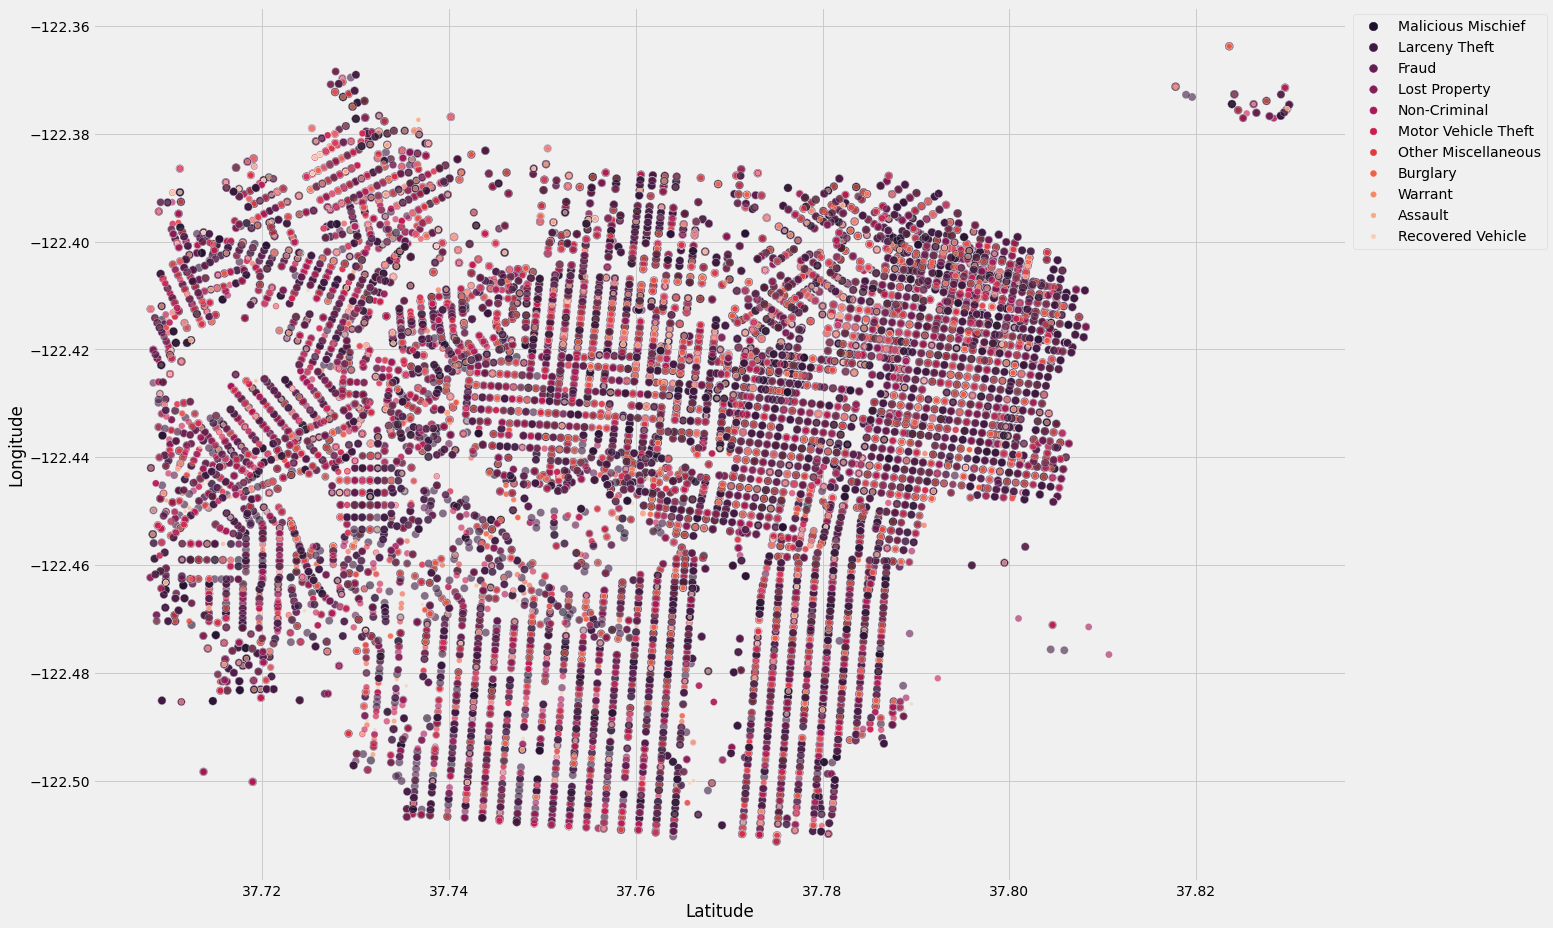

In [50]:
  with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(1, 1, figsize=(20, 15))
  
    sns.scatterplot(data=df2[df2['year']==2020], x='Latitude', y='Longitude', alpha=0.6, palette='rocket', hue='Incident_Category', size='Incident_Category') 

    plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')

# Occurance of different types of crimes in San Francisco in 2021

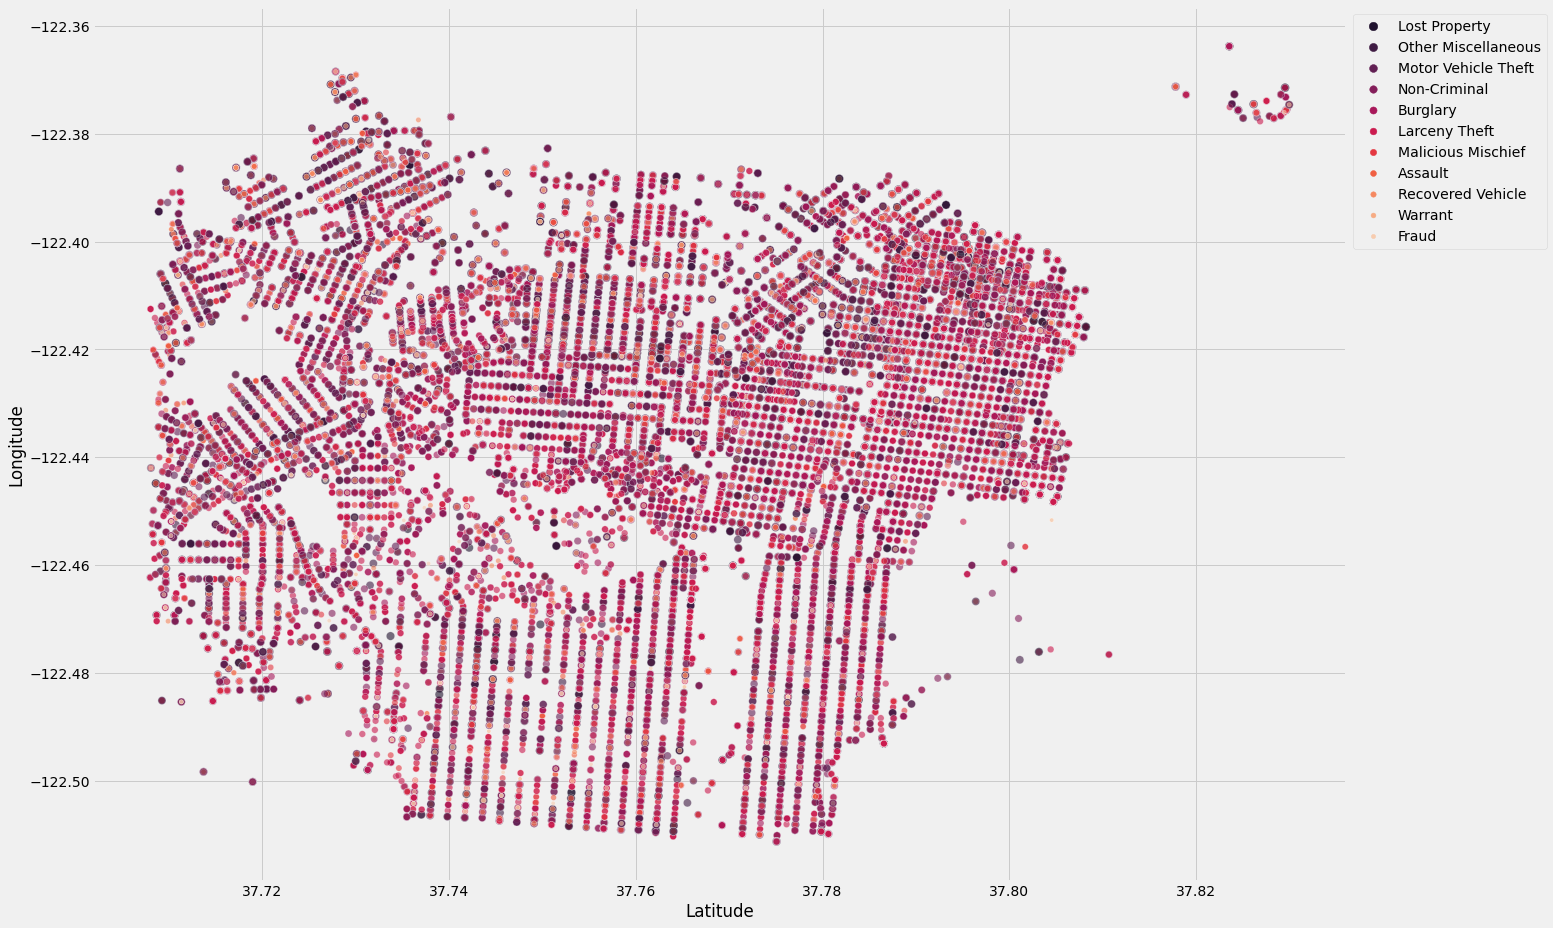

In [51]:
  with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(1, 1, figsize=(20, 15))
  
    sns.scatterplot(data=df2[df2['year']==2021], x='Latitude', y='Longitude', alpha=0.6, palette='rocket', hue='Incident_Category', size='Incident_Category') 

    plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')

# Occurance of different types of crimes in San Francisco in 2022

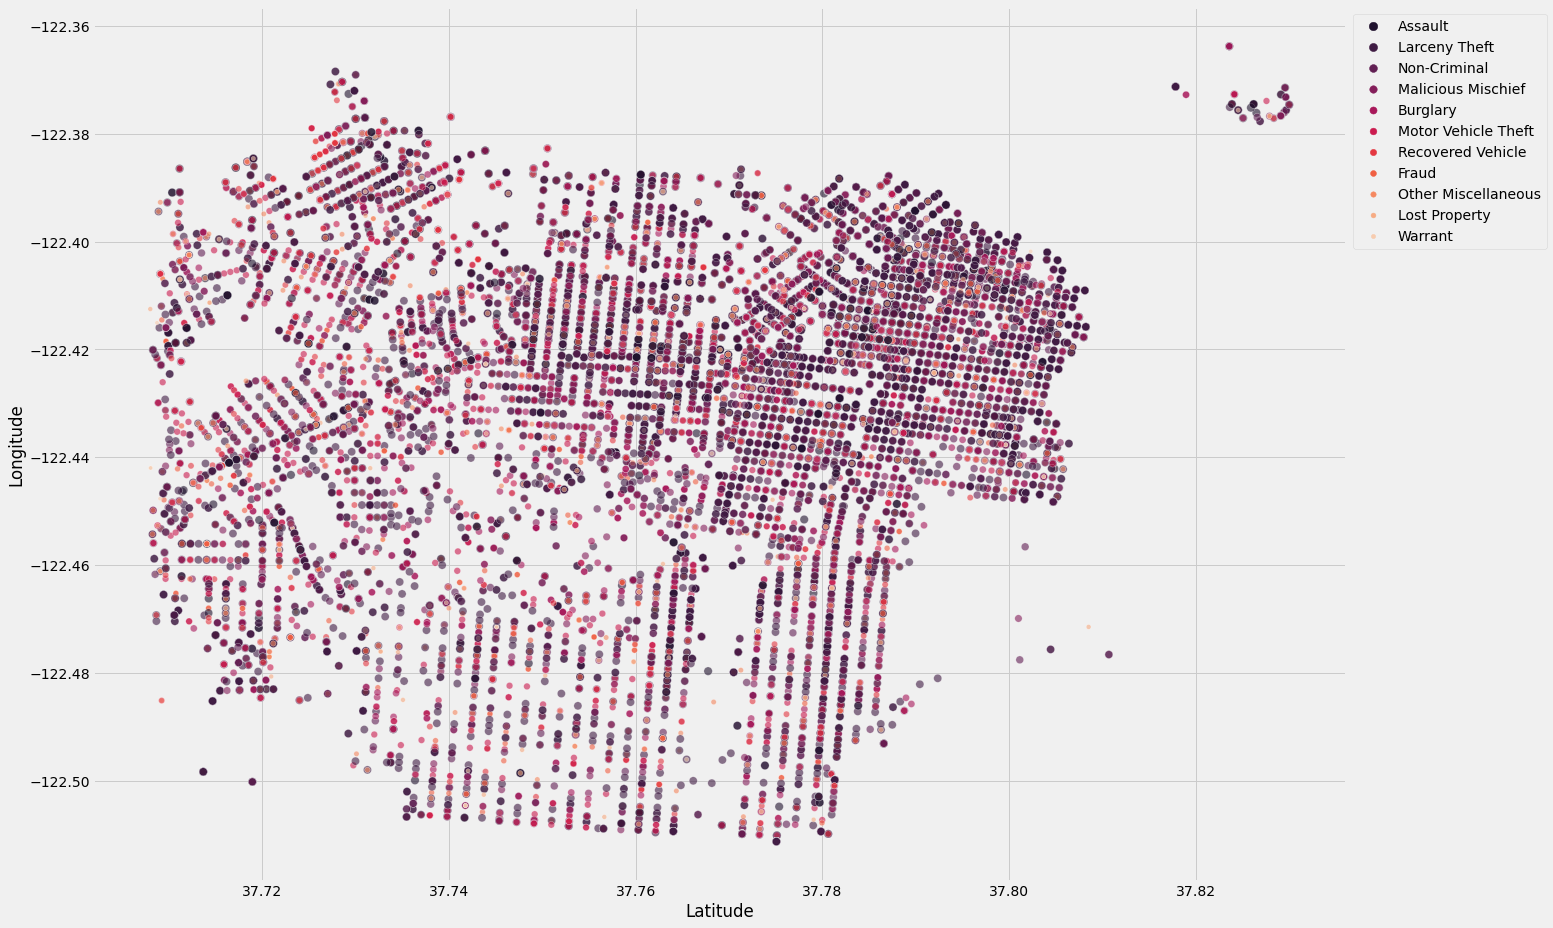

In [52]:
  with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(1, 1, figsize=(20, 15))
  
    sns.scatterplot(data=df2[df2['year']==2022], x='Latitude', y='Longitude', alpha=0.6, palette='rocket', hue='Incident_Category', size='Incident_Category') 

    plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')

In [53]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Distribution of Crime Occurance in different in Years

In [54]:
crimes_year = df2['year'].value_counts()
diff_years = pd.DataFrame(data=crimes_year.index, columns=["year"])
diff_years['values'] = crimes_year.values

In [55]:
fig = px.pie(diff_years, values='values', names='year', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()